# <font color='#FFE15D'>**Pandas**</font> 🐼

<img src="../assets/images/pandas-logo.png" alt="string indexing" width=300 align="center" />

# ✅ <font color='#FFE15D'>**Part 1: Pandas Data Structures & Structred Data**</font>

## **🔶 Section 0: Import Pandas**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
pd.__version__

'2.1.4'

## **🔶 Section 1: Introduction to Pandas**

### 🔹 What is Pandas?

Pandas is a Python library for **data manipulation and analysis**, providing powerful **data structures and functions** for working with **structured data**.

### 🔹 A simple example

In [9]:
grades = pd.read_csv('grades.csv')
grades

,name,math,calculus,sport
0,sara,88,79,92
1,sophia,80,99,89
2,john,75,81,87
3,ann,82,87,98


In [10]:
grades['average'] = grades.iloc[:, 1:].mean(axis=1)
grades

,name,math,calculus,sport,average
0,sara,88,79,92,86.333333
1,sophia,80,99,89,89.333333
2,john,75,81,87,81.000000
3,ann,82,87,98,89.000000


In [11]:
grades[['math', 'calculus', 'sport']].mean()

math        81.25
calculus    86.50
sport       91.50
dtype: float64

### 🔹 Numpy vs Pandas

While pandas <u>adopts many coding idioms from NumPy</u>, <u>the biggest difference</u> is that: 
* pandas is designed for working with **tabular or heterogeneous data**. 
* NumPy, by contrast, is best suited for working with **homogeneously typed numerical array data**.

#### Figure

<img src="imgs/numpy-vs-pandas.png" alt="string indexing" width=500 align="center" />

### 🔹 Pandas data structures

Pandas provides **two main** data structures:
1. **Series:** 1-dimensional labeled array capable of holding any data type
2. **DataFrame:** 2-dimensional labeled data structure with columns of potentially different types, similar to a <u>spreadsheet</u> or <u>SQL table</u>.

#### Figure 1

<img src="../assets/images/dataframe-series.png" alt="string indexing" width=1000 align="center" />

#### Figure 2

<img src="../assets/images/dataframe-series-2.png" alt="string indexing" width=1000 align="center" />

## **🔶 Section 2: Pandas Series**

Pandas provides **two main** data structures:
1. **Series:** 1-dimensional labeled array capable of holding any data type
2. **DataFrame:** 2-dimensional labeled data structure with columns of potentially different types, similar to a <u>spreadsheet</u> or <u>SQL table</u>.

<img src="../assets/images/dataframe-series.png" alt="string indexing" width=800 align="center" />

<img src="../assets/images/dataframe-series-2.png" alt="string indexing" width=800 align="center" />

### 🔹 Create Series from list

#### `pd.Series()`

In [20]:
grades = [78, 98, 65, 97]
grades_series = pd.Series(grades)
grades_series

0    78
1    98
2    65
3    97
dtype: int64

In [21]:
pd.Series([1., 2, True, 'Sajad'])

0      1.0
1        2
2     True
3    Sajad
dtype: object

####  `values`

In [23]:
grades_series.values

array([78, 98, 65, 97], dtype=int64)

#### `index`

In [24]:
grades_series.index

RangeIndex(start=0, stop=4, step=1)

#### Custom index

In [29]:
g = pd.Series(grades, index=['farsi', 'math', 'sport', 'art'])
g

farsi    78
math     98
sport    65
art      97
dtype: int64

In [31]:
g.values
g.index

Index(['farsi', 'math', 'sport', 'art'], dtype='object')

##### Indices are immutable

In [33]:
g.index[0] = 'cal'

TypeError: Index does not support mutable operations

In [35]:
g.values[0] = 23

#### `name`

In [40]:
g = pd.Series(grades, index=['farsi', 'math', 'sport', 'art'], name='sara')
g

farsi    78
math     98
sport    65
art      97
Name: sara, dtype: int64

#### `dtype`

`int`, `float`, `bool`, `object`

In [42]:
pd.Series([78, 98, 65, 97.])

0    78.0
1    98.0
2    65.0
3    97.0
dtype: float64

In [43]:
pd.Series([False, True, False, False])

0    False
1     True
2    False
3    False
dtype: bool

In [44]:
pd.Series(['A', 'B', 'C', 'D'])

0    A
1    B
2    C
3    D
dtype: object

In [46]:
pd.Series([2, 1, '0', 15., True])

0       2
1       1
2       0
3    15.0
4    True
dtype: object

In [58]:
grades = [78, 98, 65, 97.5]
pd.Series(grades, index=['math', 'sport', 'art', 'farsi'], dtype=np.int32)

ValueError: Trying to coerce float values to integers

### 🔹 Indexing

In [69]:
grades = pd.Series([78, 98, 65, 97])
grades

0    78
1    98
2    65
3    97
dtype: int64

In [70]:
grades[0], grades[1]
grades[1:3]
grades[:3]
grades[2:]
grades[0::2]
grades[-1]

KeyError: -1

In [71]:
grades = pd.Series([78, 98, 65, 97], index=[-1, 0, 2, 3])
grades[-1]

78

In [72]:
grades = pd.Series([78, 98, 65, 97], index=['math', 'sport', 'art', 'farsi'])
grades

math     78
sport    98
art      65
farsi    97
dtype: int64

In [74]:
grades['math']
grades[['math', 'sport']]

math     78
sport    98
dtype: int64

In [78]:
grades.math, grades.sport

(78, 98)

In [92]:
grades = pd.Series([78, 98, 65, 97], index=[-1, 0, 'c', '_2'])
grades[-1], grades.c, grades._2

(78, 65, 97)

In [96]:
grades.c = 62
grades['c'] = 63
grades

-1    78
0     98
c     63
_2    97
dtype: int64

### 🔹 Create Series from array

In [98]:
grades_np = np.array([78, 98, 65, 97])
grades_np
s_grades1 = pd.Series(grades_np)
s_grades1

0    78
1    98
2    65
3    97
dtype: int32

#### `copy`

In [101]:
grades_np = np.array(grades)
s_grades1 = pd.Series(grades_np)
s_grades1[0] = -99
s_grades1
grades_np

array([-99,  98,  63,  97], dtype=int64)

In [103]:
grades_np = np.array(grades)
s_grades1 = pd.Series(grades_np, copy=True)
s_grades1[0] = -99
s_grades1, grades_np

(0   -99
 1    98
 2    63
 3    97
 dtype: int64,
 array([78, 98, 63, 97], dtype=int64))

### 🔹 Create Series from dictionary

In [106]:
pd.Series({'one':1, 'two':2, 'four':4, 'three':3})

one      1
two      2
four     4
three    3
dtype: int64

#### Change order by index

In [107]:
ser1 = pd.Series({'one':1, 'two':2, 'three':3, 'four':4}, index=['four', 'one', 'three', 'two'])
ser1

four     4
one      1
three    3
two      2
dtype: int64

In [108]:
ser2 = pd.Series({'one':1, 'two':2, 'three':3, 'four':4}, index=['four', 'one', 'three', 'two', 'five'])
ser2

four     4.0
one      1.0
three    3.0
two      2.0
five     NaN
dtype: float64

## **✍️ Example: Simple Series**

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ یک سریز به طول 10 با مقادیر زوج بسازید.
</div>

In [113]:
g = pd.Series([i for i in range(2, 22, 2)])
len(g)
g

0     2
1     4
2     6
3     8
4    10
5    12
6    14
7    16
8    18
9    20
dtype: int64

## **🔶 Section 3: Pandas DataFrame**

Pandas provides **two main** data structures:
1. **Series:** 1-dimensional labeled array capable of holding any data type
2. **DataFrame:** 2-dimensional labeled data structure with columns of potentially different types, similar to a <u>spreadsheet</u> or <u>SQL table</u>.

<img src="../assets/images/dataframe-series.png" alt="string indexing" width=800 align="center" />

<img src="../assets/images/dataframe-series-2.png" alt="string indexing" width=800 align="center" />

### 🔹 Create DataFrame from Series

In [125]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds)
hoda = pd.Series([15, 20, 18, 18], index=inds)
hasan = pd.Series([15, 20, 18, 19], index=inds)
howsam = pd.Series([20, 20, 18, 18], index=inds)

grades = pd.DataFrame([sara, hoda, hasan, howsam])
grades

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18
2,15,20,18,19
3,20,20,18,18


In [126]:
grades = pd.DataFrame([sara, hoda, hasan, howsam], index=['sara', 'hoda', 'hasan', 'howsam'])
grades

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18
hasan,15,20,18,19
howsam,20,20,18,18


In [132]:
sara.name = 'sara'
hoda.name = 'hoda'
hasan.name = 'hasan'
howsam.name = 'howsam'

grades = pd.DataFrame([sara, hoda, hasan, howsam])
grades

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18
hasan,15,20,18,19
howsam,20,20,18,18


In [133]:
sara = pd.Series([20, 18, 19, 20], index=inds, name='sara')
hoda = pd.Series([15, 20, 18, 18], index=inds)
hasan = pd.Series([15, 20, 18, 19], index=inds)
howsam = pd.Series([20, 20, 18, 18], index=inds)

grades = pd.DataFrame([sara, hoda, hasan, howsam])
grades

,math,sport,art,farsi
sara,20,18,19,20
Unnamed 0,15,20,18,18
Unnamed 1,15,20,18,19
Unnamed 2,20,20,18,18


In [137]:
sara = pd.Series([20, 18, 19, 20], index=inds)
hoda = pd.Series([15, 20, 18, 18], index=inds)
hasan = pd.Series([15, 20, 18, 19], index=inds)
howsam = pd.Series([20, 20, 18, 18], index=inds)

grades = pd.DataFrame()
grades['Sara'] = sara
grades['Hoda'] = hoda
grades

,Sara,Hoda
math,20,15
sport,18,20
art,19,18
farsi,20,18


### 🔹 Create DataFrame from nested list or array

In [143]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

np.array(a)
b = pd.DataFrame(a, index=['r0', 'r1', 'r2'], columns=['c0', 'c1', 'c2'])
b

,c0,c1,c2
r0,1,2,3
r1,4,5,6
r2,7,8,9


In [146]:
b['c2']

r0    3
r1    6
r2    9
Name: c2, dtype: int64

### 🔹 Create DataFrame from dictionary

In [152]:
sara = {'math':88, 'calculus':79, 'sport':92}
pd.Series(math)

sara      88
sophia    98
john      75
ann       82
dtype: int64

In [161]:
pd.DataFrame([sara])

,math,calculus,sport
0,88,79,92


In [156]:
sara = {'math':88, 'calculus':79, 'sport':92}
sophia = {'math':98, 'calculus':99, 'sport':89}
john = {'math':75, 'calculus':81, 'sport':87}
ann = {'math':82, 'calculus':87, 'sport':98}

pd.DataFrame([sara, sophia, john, ann], index=['sara', 'sophia', 'john', 'ann'])

,math,calculus,sport
sara,88,79,92
sophia,98,99,89
john,75,81,87
ann,82,87,98


In [159]:
df = pd.DataFrame()
df['sara'] = sara
df['sophia'] = sophia
df

,sara,sophia
math,88,98
calculus,79,99
sport,92,89


In [162]:
all_grades = {'sara': sara, 'sophia': sophia, 'john': john, 'ann': ann}
all_grades

pd.DataFrame(all_grades)

,sara,sophia,john,ann
math,88,98,75,82
calculus,79,99,81,87
sport,92,89,87,98


In [170]:
sara = pd.Series([20, 18, 19, 20], index=inds)
hoda = pd.Series([15, 20, 18, 18], index=inds)
hasan = pd.Series([15, 20, 18, 19], index=inds)
howsam = pd.Series([20, 20, 18, 18], index=inds)

# all_grades = pd.Series({'sara': sara, 'hoda': hoda, 'hasan': hasan, 'howsam': howsam})
all_grades = {'sara': sara, 'hoda': hoda, 'hasan': hasan, 'howsam': howsam}
pd.DataFrame(all_grades)

,sara,hoda,hasan,howsam
math,20,15,15,20
sport,18,20,20,20
art,19,18,18,18
farsi,20,18,19,18


### 🔹 Extract information 

#### `values`

In [172]:
vals = grades.values
vals[0] = -1
vals

array([[-1, -1, -1, -1],
       [79, 99, 81, 87],
       [92, 89, 87, 98]], dtype=int64)

#### `columns`

In [175]:
cols = grades.columns
cols
# cols[0] = 'mathh'

Index(['sara', 'sophia', 'john', 'ann'], dtype='object')

#### `index`

In [176]:
inds = grades.index
inds

Index(['math', 'calculus', 'sport'], dtype='object')

### 🔹 Reindex (advanced)

In [198]:
math = {'sara':88, 'sophia':98, 'john':75, 'ann':82}
calculus = {'sara':79, 'sophia':99, 'john':81, 'ann':87}
sport = {'sara':92, 'sophia':89, 'john':87, 'ann':98}

overal_grades = {'math':math, 'calculus':calculus, 'sport':sport}

grades = pd.DataFrame(overal_grades)
grades

,math,calculus,sport
sara,88,79,92
sophia,98,99,89
john,75,81,87
ann,82,87,98


In [199]:
grades.reindex(index=['sara', 'ann', 'john', 'sophia'])

,math,calculus,sport
sara,88,79,92
ann,82,87,98
john,75,81,87
sophia,98,99,89


In [200]:
grades.reindex(columns=['math', 'sport', 'calculus'])

,math,sport,calculus
sara,88,92,79
sophia,98,89,99
john,75,87,81
ann,82,98,87


In [202]:
grades.reindex(['sara', 'ann', 'john', 'sophia'], axis=0)

,math,calculus,sport
sara,88,79,92
ann,82,87,98
john,75,81,87
sophia,98,99,89


In [204]:
grades.reindex(['math', 'sport', 'calculus'], axis=1)

,math,sport,calculus
sara,88,92,79
sophia,98,89,99
john,75,87,81
ann,82,98,87


#### Exercise

In [179]:
grades.reindex(index=..., columns=...)

,sport,math,calculus
sophia,89,98,99
john,87,75,81
sara,92,88,79
ann,98,82,87


#### `fill_value`

In [208]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

df = pd.DataFrame(a, columns=['c0', 'c1', 'c2'], index=['r0', 'r1', 'r2'])
df
df.reindex(['r1', 'r0', 'r3', 'r2', 'r4'], fill_value=-999)

,c0,c1,c2
r1,4,5,6
r0,1,2,3
r3,-999,-999,-999
r2,7,8,9
r4,-999,-999,-999


In [209]:
df.reindex(['r1', 'r0', 'r3', 'r2', 'r4'], method='ffill')

,c0,c1,c2
r1,4,5,6
r0,1,2,3
r3,7,8,9
r2,7,8,9
r4,7,8,9


### 🔹 Rename (Advanced)

#### Columns

In [226]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

df = pd.DataFrame(a, columns=['c0', 'c1', 'c2'], index=['r0', 'r1', 'r2'])
df

,c0,c1,c2
r0,1,2,3
r1,4,5,6
r2,7,8,9


In [218]:
df.columns = ['col0', 'col1', 'col2']
df

,col0,col1,col2
r0,1,2,3
r1,4,5,6
r2,7,8,9


In [225]:
df1 = pd.DataFrame(a, columns=['c 0', 'c1', 'c2'], index=['r0', 'r1', 'r2'])
df1['c 0']

r0    1
r1    4
r2    7
Name: c 0, dtype: int64

In [231]:
df.rename(columns={'c0': 'col0', 'c1': 'col1'}, inplace=True)
df

,col0,col1,c2
r0,1,2,3
r1,4,5,6
r2,7,8,9


#### Index

In [232]:
df.index = ['r00', 'r11', 'r22']
df

,col0,col1,c2
r00,1,2,3
r11,4,5,6
r22,7,8,9


In [234]:
df.rename(index={'r00': 'row0'}, inplace=True)
df

,col0,col1,c2
row0,1,2,3
r11,4,5,6
r22,7,8,9


#### Exercise: Use `mapper` and `axis`

## **✍️ Example: Movies Dataset**

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ اطلاعات 10 فیلم به شما داده شده است. با استفاده از این اطلاعات، یک دیتافریم ساخته و در متغیر به نام movies ذخیره کنید.
</div>

In [9]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [10]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
df

,Sell Price,Genre,IMDB Score,Director,Year
The Shawshank Redemption,15,Drama,9.3,Darabont,1994
The Godfather,20,Crime,9.2,Coppola,1972
The Dark Knight,18,"Action, Thriller",9.0,Nolan,2008
Pulp Fiction,12,Crime,8.9,Tarantino,1994
Schindler's List,25,"Drama, History",8.9,Spielberg,1993
12 Angry Men,10,Drama,8.9,Lumet,1957
The Lord of the Rings,22,"Fantasy, Adventure",8.9,Jackson,2003
Forest Gump,14,Drama,8.8,Zemeckis,1994
Whiplash,16,"Drama, Music",8.8,Chazelle,2014
Inception,19,"Sci-Fi, Thriller",8.8,Nolan,2010


In [34]:
df = pd.DataFrame(index=movie_names)
df["Sell Price"] = sell_price
# df["..."] = ...
df

,Sell Price
The Shawshank Redemption,15
The Godfather,20
The Dark Knight,18
Pulp Fiction,12
Schindler's List,25
12 Angry Men,10
The Lord of the Rings,22
Forest Gump,14
Whiplash,16
Inception,19


In [42]:
# for s, g in zip(sell_price, genre):
#     print(s, g)

df = pd.DataFrame(zip(sell_price, genre, imdb), index=movie_names, columns=["Sell Price", "Genre", "IMDB Score"])
df

,Sell Price,Genre,IMDB Score
The Shawshank Redemption,15,Drama,9.3
The Godfather,20,Crime,9.2
The Dark Knight,18,"Action, Thriller",9.0
Pulp Fiction,12,Crime,8.9
Schindler's List,25,"Drama, History",8.9
12 Angry Men,10,Drama,8.9
The Lord of the Rings,22,"Fantasy, Adventure",8.9
Forest Gump,14,Drama,8.8
Whiplash,16,"Drama, Music",8.8
Inception,19,"Sci-Fi, Thriller",8.8


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    در نام فیلم Forest Gump یک غلط املایی وجود دارد؛ آن را اصلاح کنید.
</div>

In [47]:
df = pd.DataFrame(cols, index=movie_names)
df.rename(index={"Forest Gump": "Forrest Gump"}, inplace=True)
df

,Sell Price,Genre,IMDB Score,Director,Year
The Shawshank Redemption,15,Drama,9.3,Darabont,1994
The Godfather,20,Crime,9.2,Coppola,1972
The Dark Knight,18,"Action, Thriller",9.0,Nolan,2008
Pulp Fiction,12,Crime,8.9,Tarantino,1994
Schindler's List,25,"Drama, History",8.9,Spielberg,1993
12 Angry Men,10,Drama,8.9,Lumet,1957
The Lord of the Rings,22,"Fantasy, Adventure",8.9,Jackson,2003
Forrest Gump,14,Drama,8.8,Zemeckis,1994
Whiplash,16,"Drama, Music",8.8,Chazelle,2014
Inception,19,"Sci-Fi, Thriller",8.8,Nolan,2010


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    در لیست زیر، نام فیلم‌ها به ترتیب مقدار فروش مرتب شده‌اند. دیتافریم را متناسب با این لیست مرتب کنید.
</div>

In [48]:
sorted_names = ["Schindler's List", 'The Lord of the Rings', 'The Godfather', 'Inception', 'The Dark Knight', 
                'Whiplash', 'The Shawshank Redemption', 'Forrest Gump', 'Pulp Fiction', '12 Angry Men']

df.reindex(index=sorted_names)

,Sell Price,Genre,IMDB Score,Director,Year
Schindler's List,25,"Drama, History",8.9,Spielberg,1993
The Lord of the Rings,22,"Fantasy, Adventure",8.9,Jackson,2003
The Godfather,20,Crime,9.2,Coppola,1972
Inception,19,"Sci-Fi, Thriller",8.8,Nolan,2010
The Dark Knight,18,"Action, Thriller",9.0,Nolan,2008
Whiplash,16,"Drama, Music",8.8,Chazelle,2014
The Shawshank Redemption,15,Drama,9.3,Darabont,1994
Forrest Gump,14,Drama,8.8,Zemeckis,1994
Pulp Fiction,12,Crime,8.9,Tarantino,1994
12 Angry Men,10,Drama,8.9,Lumet,1957


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    تمرین: نام ستون‌ها را طوری تغییر دهید که Codable شوند.
</div>

In [51]:
df["Sell Price"]
# df.sell_price

The Shawshank Redemption    15
The Godfather               20
The Dark Knight             18
Pulp Fiction                12
Schindler's List            25
12 Angry Men                10
The Lord of the Rings       22
Forrest Gump                14
Whiplash                    16
Inception                   19
Downton Abbey               12
Name: Sell Price, dtype: int64

## **🔶 Section 4: Indexing & Slicing**

In [63]:
df1 = pd.DataFrame(cols, index=movie_names)
df1

,Sell Price,Genre,IMDB Score,Director,Year
The Shawshank Redemption,15,Drama,9.3,Darabont,1994
The Godfather,20,Crime,9.2,Coppola,1972
The Dark Knight,18,"Action, Thriller",9.0,Nolan,2008
Pulp Fiction,12,Crime,8.9,Tarantino,1994
Schindler's List,25,"Drama, History",8.9,Spielberg,1993
12 Angry Men,10,Drama,8.9,Lumet,1957
The Lord of the Rings,22,"Fantasy, Adventure",8.9,Jackson,2003
Forest Gump,14,Drama,8.8,Zemeckis,1994
Whiplash,16,"Drama, Music",8.8,Chazelle,2014
Inception,19,"Sci-Fi, Thriller",8.8,Nolan,2010


In [64]:
math = {'sara':88, 'sophia':98, 'john':75, 'ann':82}
calculus = {'sara':79, 'sophia':99, 'john':81, 'ann':87}
sport = {'sara':92, 'sophia':89, 'john':87, 'ann':98}

overall_grades = {'math':math, 'calculus':calculus, 'sport':sport}
df2 = pd.DataFrame(overall_grades)
df2

,math,calculus,sport
sara,88,79,92
sophia,98,99,89
john,75,81,87
ann,82,87,98


### 🔹 Access columns on a DataFrame

In [72]:
df1["Sell Price"]
type(df1["Genre"])
type(df1[["Sell Price", "Genre"]])

pandas.core.frame.DataFrame

In [75]:
df1.Genre, df1.Year

(The Shawshank Redemption                 Drama
 The Godfather                            Crime
 The Dark Knight               Action, Thriller
 Pulp Fiction                             Crime
 Schindler's List                Drama, History
 12 Angry Men                             Drama
 The Lord of the Rings       Fantasy, Adventure
 Forest Gump                              Drama
 Whiplash                          Drama, Music
 Inception                     Sci-Fi, Thriller
 Downton Abbey                   Drama, History
 Name: Genre, dtype: object,
 The Shawshank Redemption    1994
 The Godfather               1972
 The Dark Knight             2008
 Pulp Fiction                1994
 Schindler's List            1993
 12 Angry Men                1957
 The Lord of the Rings       2003
 Forest Gump                 1994
 Whiplash                    2014
 Inception                   2010
 Downton Abbey               2019
 Name: Year, dtype: int64)

#### What happens to duplicates?

In [76]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [3, 2, 1]]

df3 = pd.DataFrame(a, columns=['c0', 'c1', 'c0'], index=['r0', 'r1', 'r2', 'r0'])
df3

,c0,c1,c0
r0,1,2,3
r1,4,5,6
r2,7,8,9
r0,3,2,1


In [78]:
df3['c0']
df3.c0

,c0,c0
r0,1,3
r1,4,6
r2,7,9
r0,3,1


### 🔹 `iloc`

#### - Indexing

In [91]:
df2.iloc[-1]
df2.iloc[2, 1]
# df2.sara

81

#### - Slicing

In [102]:
df2.iloc[1, :]
df2.iloc[:, 1:]
df2.iloc[:, :-1]
df2.iloc[1:-1, :-1]
df2.iloc[[1, 3], :-1]
# df2.iloc['sara']

,math,calculus
sophia,98,99
ann,82,87


### 🔹 `loc`

#### - Indexing

In [108]:
df2.loc['sara']
df2.loc['sara', 'sport']

92

In [110]:
df3.loc['r0', 'c0']

,c0,c0
r0,1,3
r0,3,1


#### - Slicing

In [119]:
df2.loc[:, 'calculus']
df2.loc[:, 'calculus':'sport']
df2.loc[:, ['math', 'sport']]
df2.loc['sara':'john', ['math', 'sport']]
df2.loc[['sara', 'john'], ['math', 'sport']]

,math,sport
sara,88,92
john,75,87


In [123]:
df1 = pd.DataFrame(cols)
df1.loc[0, 'Year']

1994

In [124]:
df2.loc[0]

KeyError: 0

In [127]:
df1['IMDB Score':]

TypeError: cannot do slice indexing on RangeIndex with these indexers [IMDB Score] of type str

### 🔹 Assigning Values in Pandas

#### - Assign a single value

In [128]:
a = np.random.randint(0, 20, (3, 5))

df2 = pd.DataFrame(a, columns=['c0', 'c1', 'c2', 'c3', 'c1'], index=['r0', 'r1', 'r2'])
df2

,c0,c1,c2,c3,c1
r0,4,1,2,4,8
r1,8,15,13,7,14
r2,10,11,10,11,17


In [130]:
df2.loc['r0', 'c0'] = -1
df2

,c0,c1,c2,c3,c1
r0,-1,1,2,4,8
r1,8,15,13,7,14
r2,10,11,10,11,17


In [134]:
df2.loc['r0', 'c1'] = 20
df2

,c0,c1,c2,c3,c1
r0,-1,20,2,4,20
r1,8,15,13,7,14
r2,10,11,10,11,17


In [132]:
df2.iloc[0, 1] = 66
df2

,c0,c1,c2,c3,c1
r0,-1,66,2,4,55
r1,8,15,13,7,14
r2,10,11,10,11,17


#### -Assign multiple values

In [135]:
df2

,c0,c1,c2,c3,c1
r0,-1,20,2,4,20
r1,8,15,13,7,14
r2,10,11,10,11,17


In [136]:
df2['c0'] = [4, 3, 2]
df2

,c0,c1,c2,c3,c1
r0,4,20,2,4,20
r1,3,15,13,7,14
r2,2,11,10,11,17


In [138]:
df2[['c0', 'c3']] = np.array([[-2, -3], [-4, -5], [-6, -7]])
df2

,c0,c1,c2,c3,c1
r0,-2,20,2,-3,20
r1,-4,15,13,-5,14
r2,-6,11,10,-7,17


In [143]:
ser = pd.Series([11, 22], index=['r0', 'r2'])
ser

r0    11
r2    22
dtype: int64

In [144]:
df2['c2'] = ser
df2

,c0,c1,c2,c3,c1
r0,-2,20,11.0,-3,20
r1,-4,15,NaN,-5,14
r2,-6,11,22.0,-7,17


In [149]:
ser = pd.Series([11, 22, 33], index=['r2', 'r0', 'r1'])
ser

r2    11
r0    22
r1    33
dtype: int64

In [150]:
df2['c2'] = ser
df2

,c0,c1,c2,c3,c1
r0,-2,20,22,-3,20
r1,-4,15,33,-5,14
r2,-6,11,11,-7,17


### 🔹 Supplementary

In [151]:
math = {'sara':88, 'sophia':98, 'john':75, 'ann':82}
calculus = {'sara':79, 'sophia':99, 'john':81, 'ann':87}
sport = {'sara':92, 'sophia':89, 'john':87, 'ann':98}

overall_grades = {'math':math, 'calculus':calculus, 'sport':sport}
df2 = pd.DataFrame(overall_grades)
df2

,math,calculus,sport
sara,88,79,92
sophia,98,99,89
john,75,81,87
ann,82,87,98


#### - Access rows on a DataFrame

In [158]:
df2[0::2]
# df2[[0, 1]]
df2[0:1]

,math,calculus,sport
sara,88,79,92


#### - Access a single value in DataFrame 

In [164]:
df2.math['sara'], df2.loc['sara', 'math']
df2['math']['sara'], df2.math[0]

C:\Users\howsa\AppData\Local\Temp\ipykernel_2068\3373537728.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2['math']['sara'], df2.math[0]


(88, 88)

## **✍️ Example: Movies Dataset**

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ اطلاعات زیر را از دیتاست movies استخراج کنید.
    <ol>
      <li>قیمت فروش فیلم "The Godfather" را نمایش دهید.</li>
      <li>ژانر فیلم "Pulp Fiction" را نمایش دهید.</li>
      <li>امتیاز فیلم "Forest Gump" در IMDB را استخراج کنید.</li>
      <li>کارگردان فیلم "Inception" را نمایش دهید.</li>
      <li>سال اکران فیلم "Whiplash" را نمایش دهید.</li>
      <li>قیمت فروش فیلم های "The Dark Knight" و "Schindler's List" را نمایش دهید.</li>
      <li>ژانر فیلم های "12 Angry Men" و "The Lord of the Rings" را استخراج کنید.</li>
      <li>امتیاز فیلم های "Downton Abbey" و "The Shawshank Redemption" در IMDB را استخراج کنید.</li>
      <li>کارگردان فیلم های "The Godfather" و "Pulp Fiction" را نمایش دهید.</li>
      <li>سال اکران فیلم های "Inception" و "The Lord of the Rings" را نمایش دهید.</li>
    </ol>
</div>

In [9]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [28]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

movies = pd.DataFrame(cols, index=movie_names)
movies

,Sell Price,Genre,IMDB Score,Director,Year
The Shawshank Redemption,15,Drama,9.3,Darabont,1994
The Godfather,20,Crime,9.2,Coppola,1972
The Dark Knight,18,"Action, Thriller",9.0,Nolan,2008
Pulp Fiction,12,Crime,8.9,Tarantino,1994
Schindler's List,25,"Drama, History",8.9,Spielberg,1993
12 Angry Men,10,Drama,8.9,Lumet,1957
The Lord of the Rings,22,"Fantasy, Adventure",8.9,Jackson,2003
Forest Gump,14,Drama,8.8,Zemeckis,1994
Whiplash,16,"Drama, Music",8.8,Chazelle,2014
Inception,19,"Sci-Fi, Thriller",8.8,Nolan,2010


In [16]:
movies.loc["The Godfather", "Sell Price"]

20

In [18]:
movies.loc[["The Lord of the Rings", "12 Angry Men"], "Genre"]

The Lord of the Rings    Fantasy, Adventure
12 Angry Men                          Drama
Name: Genre, dtype: object

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    سه فیلم برتر از نظر IMDB Score را نمایش دهید.
</div>

In [21]:
movies.iloc[:3]
# movies[0:3]

,Sell Price,Genre,IMDB Score,Director,Year
The Shawshank Redemption,15,Drama,9.3,Darabont,1994
The Godfather,20,Crime,9.2,Coppola,1972
The Dark Knight,18,"Action, Thriller",9.0,Nolan,2008


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    سه فیلم پرفروش و کم‌فروش را نمایش دهید.
</div>

In [31]:
sorted_names = ["Schindler's List", 'The Lord of the Rings', 'The Godfather', 'Inception', 'The Dark Knight', 
                'Whiplash', 'The Shawshank Redemption', 'Forest Gump', 'Pulp Fiction', '12 Angry Men']

movies2 = movies.reindex(index=sorted_names)
movies2.iloc[-3:]

,Sell Price,Genre,IMDB Score,Director,Year
Forest Gump,14,Drama,8.8,Zemeckis,1994
Pulp Fiction,12,Crime,8.9,Tarantino,1994
12 Angry Men,10,Drama,8.9,Lumet,1957


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    تمرین: سه فیلم جدید و قدیمی را پیدا کنید.
</div>

## **🔶 Section 5: CSV File** 📅

### 🔹 Load CSV

In [54]:
pd.read_csv??

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

#### - Read from file

In [56]:
df = pd.read_csv("data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


#### - Read from URL

In [59]:
df_url = pd.read_csv('https://calmcode.io/static/data/chickweight.csv')
df_url

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
...,...,...,...,...
573,175,14,50,4
574,205,16,50,4
575,234,18,50,4
576,264,20,50,4


#### - `index_col`

In [61]:
df3 = pd.read_csv('data/insurance.csv', index_col='age')
df3

,sex,bmi,children,smoker,region,charges
age,,,,,,
19.0,female,27.900,0.0,yes,southwest,16884.92400
NaN,male,33.770,1.0,no,southeast,1725.55230
28.0,male,33.000,3.0,no,southeast,4449.46200
33.0,male,22.705,0.0,no,northwest,21984.47061
32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...
50.0,male,30.970,3.0,no,northwest,10600.54830
18.0,female,31.920,0.0,no,northeast,2205.98080
NaN,female,36.850,0.0,no,southeast,1629.83350


In [65]:
df3.loc[19.0]

,sex,bmi,children,smoker,region,charges
age,,,,,,
19.0,female,27.900,0.0,yes,southwest,16884.92400
19.0,male,24.600,1.0,no,southwest,1837.23700
19.0,female,28.600,NaN,no,southwest,4687.79700
19.0,male,20.425,0.0,no,northwest,1625.43375
19.0,female,28.900,NaN,no,southwest,1743.21400
...,...,...,...,...,...,...
19.0,male,19.800,0.0,no,southwest,1241.56500
19.0,male,34.900,0.0,yes,southwest,34828.65400
19.0,female,25.745,1.0,no,northwest,2710.82855


#### - `sep`

In [67]:
pd.read_csv('data/insurance_sep.csv', sep=';')

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


#### - `header` & `names`

In [70]:
pd.read_csv('data/insurance_noheader.csv', header=None)

,0,1,2,3,4,5,6
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [72]:
pd.read_csv('data/insurance_noheader.csv', header=None, names=[f'col{i}'for i in range(7)])

,col0,col1,col2,col3,col4,col5,col6
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


#### - `na_values`

In [82]:
pd.read_csv('data/insurance.csv', na_values='female')

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,NaN,31.920,0.0,no,northeast,2205.98080
1335,NaN,NaN,36.850,0.0,no,southeast,1629.83350
1336,21.0,NaN,25.800,0.0,no,southwest,2007.94500


#### - `skiprows`

In [90]:
pd.read_csv('data/insurance-skiprows.csv', skiprows=1)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [95]:
pd.read_csv('data/insurance_noheader.csv', header=2)

,28,male,33,3,no,southeast,4449.462
0,33.0,male,22.705,0.0,no,northwest,21984.47061
1,32.0,male,28.880,0.0,no,northwest,3866.85520
2,31.0,female,25.740,0.0,no,southeast,3756.62160
3,46.0,female,33.440,1.0,no,southeast,8240.58960
4,37.0,female,27.740,3.0,no,northwest,7281.50560
...,...,...,...,...,...,...,...
1330,50.0,male,30.970,3.0,no,northwest,10600.54830
1331,18.0,female,31.920,0.0,no,northeast,2205.98080
1332,NaN,female,36.850,0.0,no,southeast,1629.83350
1333,21.0,female,25.800,0.0,no,southwest,2007.94500


#### - Advanced

##### `nrows`

In [97]:
df_5rows = pd.read_csv('data/insurance.csv', nrows=10)
df_5rows

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,NaN,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,no,northwest,28923.13692


##### `iterator` & `chunksize`

In [99]:
df_iter = pd.read_csv('data/insurance.csv', iterator=True, chunksize=100)

for iter, chunk in enumerate(df_iter):
    print("=============== ", iter, " ====================")
    display(chunk)

===============  0  ====================


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28.0,female,37.620,1.0,no,southeast,3766.88380
96,54.0,female,30.800,3.0,no,southwest,12105.32000
97,55.0,male,38.280,0.0,no,southeast,10226.28420
98,56.0,male,NaN,0.0,yes,northeast,22412.64850


===============  1  ====================


,age,sex,bmi,children,smoker,region,charges
100,41.0,female,31.600,0.0,no,southwest,6186.1270
101,30.0,male,25.460,NaN,no,northeast,3645.0894
102,18.0,female,30.115,0.0,no,northeast,21344.8467
103,61.0,female,29.920,3.0,yes,southeast,30942.1918
104,34.0,female,27.500,1.0,no,southwest,5003.8530
...,...,...,...,...,...,...,...
195,19.0,male,30.590,0.0,no,northwest,1639.5631
196,39.0,female,32.800,0.0,no,southwest,5649.7150
197,45.0,female,28.600,2.0,no,southeast,8516.8290
198,51.0,female,18.050,0.0,no,northwest,9644.2525


===============  2  ====================


,age,sex,bmi,children,smoker,region,charges
200,19,female,32.110,0.0,no,northwest,2130.67590
201,48,female,32.230,1.0,no,southeast,8871.15170
202,60,female,24.035,0.0,no,northwest,13012.20865
203,27,female,NaN,0.0,yes,southeast,37133.89820
204,46,male,22.300,0.0,no,southwest,7147.10500
...,...,...,...,...,...,...,...
295,18,male,22.990,0.0,no,northeast,1704.56810
296,19,male,27.700,0.0,yes,southwest,16297.84600
297,47,male,25.410,1.0,yes,southeast,21978.67690
298,31,male,34.390,NaN,yes,northwest,38746.35510


===============  3  ====================


,age,sex,bmi,children,smoker,region,charges
300,36.0,male,27.550,3.0,no,northeast,6746.74250
301,53.0,female,22.610,3.0,yes,northeast,24873.38490
302,56.0,female,37.510,2.0,no,southeast,12265.50690
303,28.0,female,33.000,NaN,no,southeast,4349.46200
304,57.0,female,38.000,2.0,no,southwest,12646.20700
...,...,...,...,...,...,...,...
395,46.0,male,19.855,0.0,no,northwest,7526.70645
396,43.0,female,34.400,3.0,no,southwest,8522.00300
397,21.0,male,31.020,0.0,no,southeast,16586.49771
398,64.0,male,25.600,2.0,no,southwest,14988.43200


===============  4  ====================


,age,sex,bmi,children,smoker,region,charges
400,51.0,female,20.600,0.0,no,southwest,9264.79700
401,47.0,male,47.520,1.0,no,southeast,8083.91980
402,64.0,female,32.965,0.0,no,northwest,14692.66935
403,49.0,male,32.300,3.0,no,northwest,10269.46000
404,31.0,male,20.400,0.0,no,southwest,3260.19900
...,...,...,...,...,...,...,...
495,20.0,male,27.930,0.0,no,northeast,1967.02270
496,31.0,female,23.600,2.0,no,southwest,4931.64700
497,45.0,male,28.700,2.0,no,southwest,8027.96800
498,44.0,female,23.980,2.0,no,southeast,8211.10020


===============  5  ====================


,age,sex,bmi,children,smoker,region,charges
500,29.0,male,34.400,0.0,yes,southwest,36197.69900
501,43.0,male,26.030,0.0,no,northeast,6837.36870
502,51.0,male,23.210,1.0,yes,southeast,22218.11490
503,19.0,male,30.250,0.0,yes,southeast,32548.34050
504,38.0,female,28.930,1.0,no,southeast,5974.38470
...,...,...,...,...,...,...,...
595,46.0,female,33.725,1.0,no,northeast,8823.98575
596,42.0,female,29.480,2.0,no,southeast,7640.30920
597,34.0,female,33.250,NaN,no,northeast,5594.84550
598,43.0,male,32.600,NaN,no,southwest,7441.50100


===============  6  ====================


,age,sex,bmi,children,smoker,region,charges
600,NaN,female,39.160,0.0,no,southeast,1633.04440
601,51.0,male,31.635,0.0,no,northwest,9174.13565
602,56.0,female,25.300,0.0,no,southwest,11070.53500
603,64.0,female,39.050,3.0,no,southeast,16085.12750
604,19.0,female,NaN,0.0,yes,northwest,17468.98390
...,...,...,...,...,...,...,...
695,26.0,female,40.185,0.0,no,northwest,3201.24515
696,53.0,female,32.300,2.0,no,northeast,29186.48236
697,41.0,male,35.750,1.0,yes,southeast,40273.64550
698,56.0,male,33.725,0.0,no,northwest,10976.24575


===============  7  ====================


,age,sex,bmi,children,smoker,region,charges
700,21,female,34.870,NaN,no,southeast,2020.55230
701,50,female,44.745,0.0,no,northeast,9541.69555
702,53,male,41.470,0.0,no,southeast,9504.31030
703,34,female,26.410,1.0,no,northwest,5385.33790
704,47,female,29.545,1.0,no,northwest,8930.93455
...,...,...,...,...,...,...,...
795,27,male,28.500,0.0,yes,northwest,18310.74200
796,30,male,44.220,2.0,no,southeast,4266.16580
797,30,female,22.895,1.0,no,northeast,4719.52405
798,58,female,33.100,NaN,no,southwest,11848.14100


===============  8  ====================


,age,sex,bmi,children,smoker,region,charges
800,42.0,female,26.180,1.0,no,southeast,7046.72220
801,64.0,female,35.970,0.0,no,southeast,14313.84630
802,21.0,male,22.300,1.0,no,southwest,2103.08000
803,18.0,female,42.240,0.0,yes,southeast,38792.68560
804,23.0,male,26.510,0.0,no,southeast,1815.87590
...,...,...,...,...,...,...,...
895,61.0,female,44.000,0.0,no,southwest,13063.88300
896,43.0,female,NaN,2.0,yes,northeast,19798.05455
897,19.0,male,25.555,1.0,no,northwest,2221.56445
898,NaN,female,40.260,0.0,no,southeast,1634.57340


===============  9  ====================


,age,sex,bmi,children,smoker,region,charges
900,49.0,male,22.515,0.0,no,northeast,8688.85885
901,60.0,male,40.920,NaN,yes,southeast,48673.55880
902,26.0,male,27.265,3.0,no,northeast,4661.28635
903,49.0,male,36.850,0.0,no,southeast,8125.78450
904,60.0,female,35.100,NaN,no,southwest,12644.58900
...,...,...,...,...,...,...,...
995,39.0,female,23.275,3.0,no,northeast,7986.47525
996,39.0,female,34.100,3.0,no,southwest,7418.52200
997,63.0,female,36.850,0.0,no,southeast,13887.96850
998,33.0,female,36.290,3.0,no,northeast,6551.75010


===============  10  ====================


,age,sex,bmi,children,smoker,region,charges
1000,30.0,male,22.990,2.0,yes,northwest,17361.76610
1001,24.0,male,32.700,0.0,yes,southwest,34472.84100
1002,24.0,male,25.800,0.0,no,southwest,1972.95000
1003,48.0,male,29.600,0.0,no,southwest,21232.18226
1004,47.0,male,19.190,1.0,no,northeast,8627.54110
...,...,...,...,...,...,...,...
1095,NaN,female,31.350,4.0,no,northeast,4561.18850
1096,51.0,female,34.960,2.0,yes,northeast,44641.19740
1097,22.0,male,33.770,0.0,no,southeast,1674.63230
1098,52.0,female,30.875,NaN,no,northeast,23045.56616


===============  11  ====================


,age,sex,bmi,children,smoker,region,charges
1100,33.0,female,19.095,2.0,yes,northeast,16776.30405
1101,53.0,male,28.600,3.0,no,southwest,11253.42100
1102,29.0,male,38.940,1.0,no,southeast,3471.40960
1103,58.0,male,36.080,0.0,no,southeast,11363.28320
1104,37.0,male,29.800,0.0,no,southwest,20420.60465
...,...,...,...,...,...,...,...
1195,19.0,female,27.930,3.0,no,northwest,18838.70366
1196,19.0,female,30.020,0.0,yes,northwest,33307.55080
1197,41.0,male,33.550,0.0,no,southeast,5699.83750
1198,40.0,male,29.355,1.0,no,northwest,6393.60345


===============  12  ====================


,age,sex,bmi,children,smoker,region,charges
1200,37.0,male,24.320,2.0,no,northwest,6198.75180
1201,46.0,male,40.375,2.0,no,northwest,8733.22925
1202,22.0,male,32.110,0.0,no,northwest,2055.32490
1203,51.0,male,32.300,1.0,no,northeast,9964.06000
1204,NaN,female,27.280,3.0,yes,southeast,18223.45120
...,...,...,...,...,...,...,...
1295,20.0,male,22.000,1.0,no,southwest,1964.78000
1296,18.0,male,26.125,NaN,no,northeast,1708.92575
1297,28.0,female,26.510,2.0,no,southeast,4340.44090
1298,33.0,male,27.455,2.0,no,northwest,5261.46945


===============  13  ====================


,age,sex,bmi,children,smoker,region,charges
1300,45.0,male,NaN,0.0,yes,southeast,62592.87309
1301,62.0,male,NaN,3.0,yes,northwest,46718.16325
1302,25.0,female,20.800,1.0,no,southwest,3208.78700
1303,43.0,male,27.800,0.0,yes,southwest,37829.72420
1304,42.0,male,NaN,2.0,yes,northeast,21259.37795
1305,24.0,female,27.720,0.0,no,southeast,2464.61880
1306,29.0,female,21.850,0.0,yes,northeast,16115.30450
1307,32.0,male,28.120,4.0,yes,northwest,21472.47880
1308,25.0,female,30.200,0.0,yes,southwest,33900.65300
1309,41.0,male,32.200,NaN,no,southwest,6875.96100


##### Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    تمرین: فایل ljspeech-metadata.csv را به شکل درستی بخوانید.
</div>

### 🔹 Save CSV

#### - `to_csv()`

In [125]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds)
hoda = pd.Series([15, 20, 18, 18], index=inds)
hasan = pd.Series([15, 20, 18, 19], index=inds)
howsam = pd.Series([20, 20, 18, 18], index=inds)

grades = pd.DataFrame([sara, hoda, hasan, howsam], index=['sara', 'hoda', 'hasan', 'howsam'])
grades

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18
hasan,15,20,18,19
howsam,20,20,18,18


In [126]:
grades.to_csv('data/grades.csv')

In [128]:
pd.read_csv('data/grades.csv', index_col=0)

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18
hasan,15,20,18,19
howsam,20,20,18,18


#### - `index`

In [129]:
grades = pd.DataFrame([sara, hoda, hasan, howsam])
grades

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18
2,15,20,18,19
3,20,20,18,18


In [133]:
grades.to_csv('data/grades.csv', index=False)

In [134]:
pd.read_csv('data/grades.csv')

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18
2,15,20,18,19
3,20,20,18,18


#### - `header`

In [135]:
grades

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18
2,15,20,18,19
3,20,20,18,18


In [136]:
grades.to_csv('data/grades.csv', header=False)

In [141]:
pd.read_csv('data/grades.csv', names=['col0', 'col1', 'col2', 'col3'])

,col0,col1,col2,col3
0,20,18,19,20
1,15,20,18,18
2,15,20,18,19
3,20,20,18,18


#### - `columns`

In [142]:
grades

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18
2,15,20,18,19
3,20,20,18,18


In [147]:
grades.to_csv('data/grades.csv', columns=['math', 'sport'])

In [148]:
pd.read_csv('data/grades.csv', index_col=0)

,math,sport
0,20,18
1,15,20
2,15,20
3,20,20


#### - `na_rep`

In [158]:
grades.iloc[0, 1] = np.nan
grades

,math,sport,art,farsi
0,20,NaN,19,20
1,15,20.0,18,18
2,15,20.0,18,19
3,20,20.0,18,18


In [162]:
grades.to_csv('data/grades.csv', na_rep='NaN')

In [163]:
pd.read_csv('data/grades.csv', index_col=0)

,math,sport,art,farsi
0,20,NaN,19,20
1,15,20.0,18,18
2,15,20.0,18,19
3,20,20.0,18,18


## **✍️ Example: Load Movies Dataset**

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ دیتاست imdb_movies.csv را فراخوانی کنید. 
    <a href="https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset">لینک دیتاست</a>
</div>

In [5]:
df = pd.read_csv('data/imdb_movies.csv')
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [7]:
df.columns, df.index

(Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
        'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
       dtype='object'),
 RangeIndex(start=0, stop=10178, step=1))

In [10]:
df.loc[0, 'overview']

'After dominating the boxing world, Adonis Creed has been thriving in both his career and family life. When a childhood friend and former boxing prodigy, Damien Anderson, resurfaces after serving a long sentence in prison, he is eager to prove that he deserves his shot in the ring. The face-off between former friends is more than just a fight. To settle the score, Adonis must put his future on the line to battle Damien — a fighter who has nothing to lose.'

## **✍️ Exercise: Load Movies Dataset**

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ دیتاست imdb_top_1000.csv را فراخوانی کنید. 
    <a href="https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows">لینک دیتاست</a>
</div>

# 🟥 <font color='#FFE15D'>**Part 2: Functions**</font>

## **🔶 Section 6: Frequently Used Commands** 🧂

In [113]:
data = np.random.randint(10, size=(1000, 10))
df = pd.DataFrame(data, columns=[f'col{i+1}' for i in range(data.shape[1])])
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,1,6,3,7,9,9,6,1,0,8
1,4,2,1,4,5,1,4,3,3,5
2,1,8,2,1,6,0,8,7,4,6
3,6,5,0,6,9,8,4,6,2,3
4,2,4,7,1,6,6,3,1,4,2
...,...,...,...,...,...,...,...,...,...,...
995,9,4,2,5,0,6,1,3,2,7
996,6,9,5,7,7,9,9,1,3,5
997,9,0,8,5,2,9,4,2,4,4
998,7,6,4,9,2,5,5,2,4,7


### 🔹 `values`

In [19]:
df.values

array([[9, 0, 8, ..., 6, 9, 3],
       [4, 3, 8, ..., 9, 3, 5],
       [0, 3, 0, ..., 5, 4, 1],
       ...,
       [4, 1, 0, ..., 2, 8, 2],
       [9, 6, 9, ..., 4, 3, 8],
       [7, 1, 4, ..., 6, 5, 3]])

### 🔹 `display()`

In [22]:
df

In [21]:
print(df)

     col1  col2  col3  col4  col5  col6  col7  col8  col9  col10
0       9     0     8     9     2     4     3     6     9      3
1       4     3     8     3     0     0     3     9     3      5
2       0     3     0     2     7     7     5     5     4      1
3       1     4     5     4     6     3     5     3     7      0
4       8     8     5     1     0     4     5     0     8      6
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
995     1     1     0     2     6     6     4     3     5      6
996     0     6     1     9     7     7     4     3     9      2
997     4     1     0     3     0     6     2     2     8      2
998     9     6     9     4     3     2     1     4     3      8
999     7     1     4     4     1     1     2     6     5      3

[1000 rows x 10 columns]


In [23]:
for i in range(1):
    df

In [24]:
df
a = 1

In [26]:
display(df)
a = 1

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,9,0,8,9,2,4,3,6,9,3
1,4,3,8,3,0,0,3,9,3,5
2,0,3,0,2,7,7,5,5,4,1
3,1,4,5,4,6,3,5,3,7,0
4,8,8,5,1,0,4,5,0,8,6
...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,2,6,6,4,3,5,6
996,0,6,1,9,7,7,4,3,9,2
997,4,1,0,3,0,6,2,2,8,2
998,9,6,9,4,3,2,1,4,3,8


### 🔹 `len()`

In [27]:
len(df)

1000

### 🔹 `shape`

In [28]:
df.shape

(1000, 10)

### 🔹 `size`

In [29]:
df.size

10000

In [30]:
r, c = df.shape
r*c

10000

### 🔹 `nbytes`

In [31]:
df.col1.nbytes

4000

In [32]:
df.nbytes

AttributeError: 'DataFrame' object has no attribute 'nbytes'

### 🔹 `info()`

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    1000 non-null   int32
 1   col2    1000 non-null   int32
 2   col3    1000 non-null   int32
 3   col4    1000 non-null   int32
 4   col5    1000 non-null   int32
 5   col6    1000 non-null   int32
 6   col7    1000 non-null   int32
 7   col8    1000 non-null   int32
 8   col9    1000 non-null   int32
 9   col10   1000 non-null   int32
dtypes: int32(10)
memory usage: 39.2 KB


### 🔹 `dtypes`

In [36]:
df.dtypes.iloc[0]

dtype('int32')

### 🔹 `head()`

In [42]:
df.head(3)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,9,0,8,9,2,4,3,6,9,3
1,4,3,8,3,0,0,3,9,3,5
2,0,3,0,2,7,7,5,5,4,1


### 🔹 `tail()`

In [43]:
df.tail()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
995,1,1,0,2,6,6,4,3,5,6
996,0,6,1,9,7,7,4,3,9,2
997,4,1,0,3,0,6,2,2,8,2
998,9,6,9,4,3,2,1,4,3,8
999,7,1,4,4,1,1,2,6,5,3


### 🔹 `sample()`

In [44]:
df.sample(5)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
254,5,6,5,7,9,9,9,5,9,3
916,5,6,4,5,4,9,5,9,6,9
357,0,1,3,3,2,2,5,0,9,7
474,6,9,6,0,4,7,7,1,7,2
890,4,6,0,3,9,9,0,6,7,5


### 🔹 `describe()`

In [45]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.479000,4.464000,4.542000,4.546000,4.34500,4.505000,4.440000,4.533000,4.481000,4.664000
std,2.882684,2.910872,2.846812,2.829468,2.83902,2.847118,2.855618,2.853604,2.880961,2.903021
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000
max,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000


In [53]:
desc = df.describe()
desc.loc['mean']
# desc.loc['25%']

col1     4.479
col2     4.464
col3     4.542
col4     4.546
col5     4.345
col6     4.505
col7     4.440
col8     4.533
col9     4.481
col10    4.664
Name: mean, dtype: float64

In [52]:
df.mean()

col1     4.479
col2     4.464
col3     4.542
col4     4.546
col5     4.345
col6     4.505
col7     4.440
col8     4.533
col9     4.481
col10    4.664
dtype: float64

In [114]:
df.count()

col1     1000
col2     1000
col3     1000
col4     1000
col5     1000
col6     1000
col7     1000
col8     1000
col9     1000
col10    1000
dtype: int64

### 🔹 `unique()`

In [115]:
df.nunique()

col1     10
col2     10
col3     10
col4     10
col5     10
col6     10
col7     10
col8     10
col9     10
col10    10
dtype: int64

### 🔹 `value_counts()`

In [59]:
df.col1.value_counts()

col1
4    107
9    105
3    103
7    103
0    102
2    102
1     98
6     98
8     92
5     90
Name: count, dtype: int64

### 🔹 `corr()`

In [60]:
df.corr()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
col1,1.000000,0.057469,-0.035937,0.032579,0.026755,-0.062189,0.030794,-0.015735,-0.091049,0.006333
col2,0.057469,1.000000,-0.000542,-0.014262,0.027123,0.003826,-0.002428,0.017798,-0.034279,0.025102
col3,-0.035937,-0.000542,1.000000,0.034680,-0.012384,0.018931,0.029862,0.004696,-0.031575,0.026539
col4,0.032579,-0.014262,0.034680,1.000000,0.007929,-0.026806,0.017810,0.038058,-0.005971,0.024672
col5,0.026755,0.027123,-0.012384,0.007929,1.000000,0.005545,0.018669,0.002609,-0.005011,0.009221
col6,-0.062189,0.003826,0.018931,-0.026806,0.005545,1.000000,0.006008,-0.009877,-0.040261,0.044287
col7,0.030794,-0.002428,0.029862,0.017810,0.018669,0.006008,1.000000,0.018731,0.036059,-0.015717
col8,-0.015735,0.017798,0.004696,0.038058,0.002609,-0.009877,0.018731,1.000000,-0.043757,-0.013764
col9,-0.091049,-0.034279,-0.031575,-0.005971,-0.005011,-0.040261,0.036059,-0.043757,1.000000,0.035621
col10,0.006333,0.025102,0.026539,0.024672,0.009221,0.044287,-0.015717,-0.013764,0.035621,1.000000


### 🔹 `isna()`

In [62]:
df.isna().sum()

col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     0
col8     0
col9     0
col10    0
dtype: int64

### 🔹 `to_numpy()`

In [63]:
df.to_numpy()

array([[9, 0, 8, ..., 6, 9, 3],
       [4, 3, 8, ..., 9, 3, 5],
       [0, 3, 0, ..., 5, 4, 1],
       ...,
       [4, 1, 0, ..., 2, 8, 2],
       [9, 6, 9, ..., 4, 3, 8],
       [7, 1, 4, ..., 6, 5, 3]])

### 🔹 `to_list()`

In [64]:
df.to_list()

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [67]:
print(df['col1'].to_list())

[9, 4, 0, 1, 8, 3, 6, 5, 6, 0, 9, 6, 1, 0, 0, 7, 8, 0, 8, 4, 4, 3, 6, 2, 0, 0, 1, 8, 5, 3, 0, 0, 5, 7, 8, 4, 2, 1, 6, 2, 7, 3, 8, 4, 9, 3, 0, 2, 7, 9, 4, 3, 9, 0, 8, 9, 9, 4, 4, 5, 8, 0, 1, 7, 7, 8, 5, 5, 6, 9, 0, 8, 9, 4, 3, 1, 0, 8, 5, 7, 3, 1, 9, 8, 0, 5, 9, 1, 8, 0, 1, 8, 2, 8, 3, 7, 6, 3, 3, 8, 3, 0, 2, 3, 8, 0, 1, 8, 1, 2, 2, 2, 6, 4, 5, 6, 5, 9, 3, 3, 3, 6, 1, 2, 3, 0, 0, 6, 6, 7, 8, 2, 4, 8, 2, 1, 1, 4, 6, 1, 3, 1, 1, 9, 5, 0, 2, 0, 9, 9, 1, 4, 1, 6, 2, 4, 9, 8, 6, 1, 5, 6, 0, 5, 1, 4, 9, 4, 5, 7, 6, 8, 4, 9, 5, 6, 9, 0, 2, 9, 6, 7, 0, 2, 2, 2, 7, 8, 5, 7, 4, 2, 3, 2, 0, 3, 2, 7, 4, 6, 9, 7, 6, 0, 3, 7, 3, 8, 1, 0, 5, 4, 1, 9, 3, 6, 9, 7, 7, 2, 2, 5, 7, 8, 5, 3, 4, 7, 0, 6, 8, 6, 7, 4, 2, 4, 7, 2, 6, 0, 2, 4, 2, 7, 7, 6, 5, 4, 1, 2, 3, 7, 6, 9, 5, 9, 9, 5, 6, 9, 7, 6, 1, 0, 7, 6, 2, 3, 4, 7, 4, 6, 0, 5, 7, 2, 8, 0, 4, 0, 1, 4, 9, 7, 8, 7, 8, 3, 1, 2, 3, 3, 9, 8, 2, 5, 5, 0, 4, 5, 1, 4, 9, 8, 9, 4, 4, 2, 0, 1, 2, 9, 9, 6, 6, 3, 0, 7, 9, 6, 3, 5, 0, 1, 2, 2, 9, 7, 0, 9, 9, 3, 8, 

### 🔹 `axes`

In [69]:
df.columns, df.index

(Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
        'col10'],
       dtype='object'),
 RangeIndex(start=0, stop=1000, step=1))

In [70]:
df.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
        'col10'],
       dtype='object')]

In [71]:
cols, indx = df.axes
cols, indx

(RangeIndex(start=0, stop=1000, step=1),
 Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
        'col10'],
       dtype='object'))

## **✍️ Example: Movies Dataset**

### 🔹 Dataset 1

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ دستورات پرتکرار مطرح‌شده را روی دیتاست فیلم ساختگی اعمال کنید. 
</div>

In [88]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forrest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [92]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
display(df.head())
df.shape

,Sell Price,Genre,IMDB Score,Director,Year
The Shawshank Redemption,15,Drama,9.3,Darabont,1994
The Godfather,20,Crime,9.2,Coppola,1972
The Dark Knight,18,"Action, Thriller",9.0,Nolan,2008
Pulp Fiction,12,Crime,8.9,Tarantino,1994
Schindler's List,25,"Drama, History",8.9,Spielberg,1993


(11, 5)

In [93]:
df.values

array([[15, 'Drama', 9.3, 'Darabont', 1994],
       [20, 'Crime', 9.2, 'Coppola', 1972],
       [18, 'Action, Thriller', 9.0, 'Nolan', 2008],
       [12, 'Crime', 8.9, 'Tarantino', 1994],
       [25, 'Drama, History', 8.9, 'Spielberg', 1993],
       [10, 'Drama', 8.9, 'Lumet', 1957],
       [22, 'Fantasy, Adventure', 8.9, 'Jackson', 2003],
       [14, 'Drama', 8.8, 'Zemeckis', 1994],
       [16, 'Drama, Music', 8.8, 'Chazelle', 2014],
       [19, 'Sci-Fi, Thriller', 8.8, 'Nolan', 2010],
       [12, 'Drama, History', 8.7, 'Engler', 2019]], dtype=object)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, The Shawshank Redemption to Downton Abbey
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sell Price  11 non-null     int64  
 1   Genre       11 non-null     object 
 2   IMDB Score  11 non-null     float64
 3   Director    11 non-null     object 
 4   Year        11 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


In [95]:
df.describe()

,Sell Price,IMDB Score,Year
count,11.000000,11.000000,11.000000
mean,16.636364,8.927273,1996.181818
std,4.631905,0.179393,18.329311
min,10.000000,8.700000,1957.000000
25%,13.000000,8.800000,1993.500000
50%,16.000000,8.900000,1994.000000
75%,19.500000,8.950000,2009.000000
max,25.000000,9.300000,2019.000000


In [101]:
df.describe(include='all')

,Sell Price,Genre,IMDB Score,Director,Year
count,11.000000,11,11.000000,11,11.000000
unique,NaN,7,NaN,10,NaN
top,NaN,Drama,NaN,Nolan,NaN
freq,NaN,3,NaN,2,NaN
mean,16.636364,NaN,8.927273,NaN,1996.181818
std,4.631905,NaN,0.179393,NaN,18.329311
min,10.000000,NaN,8.700000,NaN,1957.000000
25%,13.000000,NaN,8.800000,NaN,1993.500000
50%,16.000000,NaN,8.900000,NaN,1994.000000
75%,19.500000,NaN,8.950000,NaN,2009.000000


In [106]:
df.describe()

,Sell Price,IMDB Score,Year
count,11.000000,11.000000,11.000000
mean,16.636364,8.927273,1996.181818
std,4.631905,0.179393,18.329311
min,10.000000,8.700000,1957.000000
25%,13.000000,8.800000,1993.500000
50%,16.000000,8.900000,1994.000000
75%,19.500000,8.950000,2009.000000
max,25.000000,9.300000,2019.000000


In [105]:
df.describe(include='object')

,Genre,Director
count,11,11
unique,7,10
top,Drama,Nolan
freq,3,2


In [107]:
df.describe(exclude=['int', 'float'])

,Genre,Director
count,11,11
unique,7,10
top,Drama,Nolan
freq,3,2


In [108]:
df.nunique()

Sell Price    10
Genre          7
IMDB Score     6
Director      10
Year           9
dtype: int64

In [110]:
df['Sell Price'].value_counts()

Sell Price
12    2
15    1
20    1
18    1
25    1
10    1
22    1
14    1
16    1
19    1
Name: count, dtype: int64

### 🔹 Dataset 2

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ دستورات پرتکرار مطرح‌شده را روی دیتاست imdb_movies اعمال کنید. 
</div>

In [111]:
df = pd.read_csv('data/imdb_movies.csv')
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [112]:
df.describe(include='all')

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
count,10178,10178,10178.000000,10093,10178,10122,10178,10178,10178,1.017800e+04,1.017800e+04,10178
unique,9660,5688,NaN,2303,9905,9927,9736,3,54,NaN,NaN,60
top,Pinocchio,04/07/2023,NaN,Drama,We don't have an overview translated in Englis...,"Scout Taylor-Compton, Laurie Strode, Tyler Man...",Pinocchio,Released,English,NaN,NaN,AU
freq,12,41,NaN,556,89,3,12,10131,7417,NaN,NaN,4885
mean,NaN,NaN,63.497052,NaN,NaN,NaN,NaN,NaN,NaN,6.488238e+07,2.531401e+08,NaN
std,NaN,NaN,13.537012,NaN,NaN,NaN,NaN,NaN,NaN,5.707565e+07,2.777880e+08,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+07,2.858898e+07,NaN
50%,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+07,1.529349e+08,NaN
75%,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.050000e+08,4.178021e+08,NaN


### 🔹 Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ دستورات پرتکرار مطرح‌شده را روی دیتاست imdb_top_1000 اعمال کنید. 
</div>

## 🤩 <font color='#4CCD99'>**You Can Start the Howsam Machine Learning Course!**</font> 🥳

## **🔶 Section 7: `for` loop**

### 🔹 Series

In [12]:
series = pd.Series([20, 19, 18, 17], index=['Math', 'Sport', 'Art', 'Farsi'])
series

Math     20
Sport    19
Art      18
Farsi    17
dtype: int64

In [5]:
for si in series:
    print(si)

20
19
18
17


In [7]:
for index in series.index:
    print(index, series[index])

Math 20
Sport 19
Art 18
Farsi 17


#### - `items()`

In [9]:
for item in series.items():
    print(item)

for index, value in series.items():
    print(index, value)

('Math', 20)
('Sport', 19)
('Art', 18)
('Farsi', 17)
Math 20
Sport 19
Art 18
Farsi 17


In [14]:
for index, value in series.items():
    series[index] = value/2
series

C:\Users\howsa\AppData\Local\Temp\ipykernel_1740\1572600435.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  series[index] = value/2


Math     10.0
Sport     9.5
Art       9.0
Farsi     8.5
dtype: float64

#### - `apply()`

In [15]:
series.apply(lambda x: x/2)

Math     5.00
Sport    4.75
Art      4.50
Farsi    4.25
dtype: float64

In [19]:
series2 = pd.Series(['Howsam', 'Sajad', 'Mahdi', 'Saman', 'Sanam', 'Sara'])
# len(series2)
series2

0    Howsam
1     Sajad
2     Mahdi
3     Saman
4     Sanam
5      Sara
dtype: object

In [18]:
series2.apply(len)

0    6
1    5
2    5
3    5
4    5
5    4
dtype: int64

In [40]:
series2.apply(str.upper)

0    HOWSAM
1     SAJAD
2     MAHDI
3     SAMAN
4     SANAM
5      SARA
dtype: object

In [46]:
series2.apply(lambda x: x.split('a'))
series2.apply(str.split, sep='a')

0    [Hows, m]
1    [S, j, d]
2     [M, hdi]
3    [S, m, n]
4    [S, n, m]
5     [S, r, ]
dtype: object

In [49]:
series2.apply([lambda x: x.split('a'), str.upper])

,<lambda>,upper
0,"[Hows, m]",HOWSAM
1,"[S, j, d]",SAJAD
2,"[M, hdi]",MAHDI
3,"[S, m, n]",SAMAN
4,"[S, n, m]",SANAM
5,"[S, r, ]",SARA


#### - `map()` & `transform()`

In [50]:
series.map(lambda x: x/2)

Math     5.00
Sport    4.75
Art      4.50
Farsi    4.25
dtype: float64

In [51]:
series.transform(lambda x: x/2)

Math     5.00
Sport    4.75
Art      4.50
Farsi    4.25
dtype: float64

### 🔹 DataFrame

In [52]:
math = {'sara':88, 'sophia':98, 'john':75, 'ann':82}
calculus = {'sara':79, 'sophia':99, 'john':81, 'ann':87}
sport = {'sara':92, 'sophia':89, 'john':87, 'ann':98}

overal_grades = {'math':math, 'calculus':calculus, 'sport':sport}

grades = pd.DataFrame(overal_grades)
grades

,math,calculus,sport
sara,88,79,92
sophia,98,99,89
john,75,81,87
ann,82,87,98


In [54]:
for item in grades:
    print(item)

math
calculus
sport


In [57]:
for col in grades:
    print(col)
    print(15*'-')
    print(grades[col])
    print()

math
---------------
sara      88
sophia    98
john      75
ann       82
Name: math, dtype: int64

calculus
---------------
sara      79
sophia    99
john      81
ann       87
Name: calculus, dtype: int64

sport
---------------
sara      92
sophia    89
john      87
ann       98
Name: sport, dtype: int64



In [59]:
for index in grades.index:
    print(index)
    print(15*'-')
    print(grades.loc[index])
    print()

sara
---------------
math        88
calculus    79
sport       92
Name: sara, dtype: int64

sophia
---------------
math        98
calculus    99
sport       89
Name: sophia, dtype: int64

john
---------------
math        75
calculus    81
sport       87
Name: john, dtype: int64

ann
---------------
math        82
calculus    87
sport       98
Name: ann, dtype: int64



#### - `items()`

In [61]:
for col_name, col_vals in grades.items():
    print(col_name)
    print(15*'-')
    print(col_vals)
    print()

math
---------------
sara      88
sophia    98
john      75
ann       82
Name: math, dtype: int64

calculus
---------------
sara      79
sophia    99
john      81
ann       87
Name: calculus, dtype: int64

sport
---------------
sara      92
sophia    89
john      87
ann       98
Name: sport, dtype: int64



#### - `iterrows()`

In [63]:
for index, vals in grades.iterrows():
    print(index)
    print(15*'-')
    print(vals)
    print()

sara
---------------
math        88
calculus    79
sport       92
Name: sara, dtype: int64

sophia
---------------
math        98
calculus    99
sport       89
Name: sophia, dtype: int64

john
---------------
math        75
calculus    81
sport       87
Name: john, dtype: int64

ann
---------------
math        82
calculus    87
sport       98
Name: ann, dtype: int64



#### - `apply()`

In [65]:
grades.apply(lambda x: x == 98)

,math,calculus,sport
sara,False,False,False
sophia,True,False,False
john,False,False,False
ann,False,False,True


In [66]:
grades.apply(np.mean)

math        85.75
calculus    86.50
sport       91.50
dtype: float64

In [69]:
grades['avg'] = grades.apply(np.mean, axis=1)
grades

,math,calculus,sport,avg
sara,88,79,92,86.333333
sophia,98,99,89,95.333333
john,75,81,87,81.000000
ann,82,87,98,89.000000


## **✍️ Example: Movies Dataset**

### 🔹 Dataset 1

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست ساختگی اعمال کنید. 
</div>

In [ ]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forrest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [ ]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
df.head()

### 🔹 Dataset 2

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست imdb_movies اعمال کنید. 
</div>

In [140]:
df = pd.read_csv('data/imdb_movies.csv')
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [141]:
df.date_x.iloc[10000]

'09/16/2003 '

In [142]:
df.date_x.apply(lambda x: x.split('/')[-1].strip())
df['release_year'] = df.date_x.apply(lambda x: int(x.split('/')[-1]))
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


In [96]:
x = 4
del x
x

NameError: name 'x' is not defined

In [143]:
del df['date_x']
df.head()

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


In [144]:
df['score'] = df['score'].apply(lambda x: x/10)
df.head()

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,7.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,6.1,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


In [152]:
df.genre.iloc[1000].split(',\xa0')

print(sum(df.genre.isna()))

df.genre = df.genre.apply(lambda x: x.split(',\xa0') if type(x) == str else [])
df.head()

85


,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,7.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,6.1,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


In [157]:
df.crew.iloc[0].split(', ')

df.crew = df.crew.apply(lambda x: x.split(', ') if type(x) == str else [])
df.head()

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,7.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","[Óscar Barberán, Thut (voice), Ana Esther Albo...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,6.1,[Action],Good-hearted teenager William always lived in ...,"[Skeet Ulrich, Roy Cameron, Anne Heche, Dr Qui...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


### 🔹 Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ مشابه با مثال بالا، تغییراتی روی ستون‌های دیتاست imdb_top_1000 اعمال کنید. 
</div>

## **🔶 Section 8: Math Operations**

In [9]:
se1 = pd.Series(np.random.randint(0, 10, (4)), index=['A', 'B', 'C', 'D'])

se2 = pd.Series(np.random.randint(0, 10, (3)), index=['A', 'B', 'C'])

se3 = pd.Series(np.random.randint(0, 10, (5)), index=[f'row {i}' for i in range(5)])

In [10]:
df1 = pd.DataFrame(np.random.randint(0, 10, (2, 3)), columns=['A', 'B', 'C'])

df2 = pd.DataFrame(np.random.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])

### 🔹 Mathematical operators

<table style="margin-left: 0; font-size: 16px; font-family: Consolas, monospace; border-collapse: collapse; border: 1px solid gray;">
  <tr>
    <th style="border: 1px solid gray;">Python operator</th>
    <th style="border: 1px solid gray;">Pandas method(s)</th>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">+</td>
    <td style="border: 1px solid gray;">add()</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">-</td>
    <td style="border: 1px solid gray;">sub(), subtract()</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">*</td>
    <td style="border: 1px solid gray;">mul(), multiply()</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">/</td>
    <td style="border: 1px solid gray;">div()</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">%</td>
    <td style="border: 1px solid gray;">mod()</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">//</td>
    <td style="border: 1px solid gray;">floordiv()</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">**</td>
    <td style="border: 1px solid gray;">pow()</td>
  </tr>
</table>


#### - `add()`

##### -- Series + Scalar

In [18]:
se1 + 1

A    7
B    8
C    3
D    7
dtype: int32

##### -- Series + Series

In [19]:
se1 + se1

A    12
B    14
C     4
D    12
dtype: int32

In [21]:
se1

A    6
B    7
C    2
D    6
dtype: int32

In [20]:
se1 + pd.Series([1, 2, 3, 4], index=['B', 'C', 'A', 'D'])

A     9
B     8
C     4
D    10
dtype: int64

In [23]:
se1 + se2

A    12.0
B    12.0
C     9.0
D     NaN
dtype: float64

In [24]:
se1.add(se2, fill_value=0)

A    12.0
B    12.0
C     9.0
D     6.0
dtype: float64

In [38]:
se1 + se3

A       NaN
B       NaN
C       NaN
D       NaN
row 0   NaN
row 1   NaN
row 2   NaN
row 3   NaN
row 4   NaN
dtype: float64

##### -- DataFrame + Scalar

In [26]:
df1 + 2

,A,B,C
0,4,4,8
1,8,6,9


##### -- DataFrame + Series

In [29]:
display(df1)
se2

,A,B,C
0,2,2,6
1,6,4,7


A    6
B    5
C    7
dtype: int32

In [28]:
df1 + se2

,A,B,C
0,8,7,13
1,12,9,14


In [35]:
df1 + se1

,A,B,C,D
0,8,9,8,NaN
1,12,11,9,NaN


In [36]:
se3

row 0    3
row 1    1
row 2    8
row 3    6
row 4    1
dtype: int32

In [37]:
df1 + se3

,A,B,C,row 0,row 1,row 2,row 3,row 4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df1 + pd.Series([1, 2])

,A,B,C,0,1
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN


In [47]:
df1.add(pd.Series([1, 2], index=[2, 3]), axis=0)

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


##### -- DataFrame + DataFrame

In [48]:
df1 + df1

,A,B,C
0,4,4,12
1,12,8,14


In [49]:
df1 + df2

,A,B,C,D
0,11.0,10.0,12.0,NaN
1,12.0,13.0,14.0,NaN
2,NaN,NaN,NaN,NaN


In [50]:
df1.add(df2, fill_value=0)

,A,B,C,D
0,11.0,10.0,12.0,5.0
1,12.0,13.0,14.0,4.0
2,3.0,6.0,7.0,7.0


In [53]:
df1 + df2.loc[:1, 'A':'C']

,A,B,C
0,11,10,12
1,12,13,14


#### - `sub()`

#### - `mul()`

In [54]:
df1 * df2

,A,B,C,D
0,18.0,16.0,36.0,NaN
1,36.0,36.0,49.0,NaN
2,NaN,NaN,NaN,NaN


In [56]:
df1 * se2

,A,B,C
0,12,10,42
1,36,20,49


In [59]:
df1.mul(df2, fill_value=1)

,A,B,C,D
0,18.0,16.0,36.0,5.0
1,36.0,36.0,49.0,4.0
2,3.0,6.0,7.0,7.0


#### - `div()`

#### - `pow()`

### 🔹 Numpy + Pandas

In [60]:
vec = np.random.randint(0, 10, (5))
pd.Series(vec, index=[f'row {i}' for i in range(5)])

row 0    0
row 1    3
row 2    7
row 3    9
row 4    9
dtype: int32

In [61]:
pd.DataFrame(np.random.randint(0, 10, (2, 3)), columns=['A', 'B', 'C'])

,A,B,C
0,0,9,4
1,7,5,8


### 🔹 Numpy ufuncs

In [62]:
np.sin(df1)

,A,B,C
0,0.909297,0.909297,-0.279415
1,-0.279415,-0.756802,0.656987


In [63]:
np.log(df1)

,A,B,C
0,0.693147,0.693147,1.791759
1,1.791759,1.386294,1.945910


In [66]:
np.sum(df1, axis=1)

0    10
1    17
dtype: int64

In [68]:
df1.A = np.log(df1.A)
df1

,A,B,C
0,0.693147,2,6
1,1.791759,4,7


### 🔹 Pandas methods

In [78]:
df1.mean(1)

0    2.897716
1    4.263920
dtype: float64

#### - Frequently used math functions

<table style="margin-left: 0; font-size: 16px; font-family: Consolas, monospace; border-collapse: collapse; border: 1px solid gray;">
  <tr>
    <th style="border: 1px solid gray;">Method</th>
    <th style="border: 1px solid gray;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">sum()</td>
    <td style="border: 1px solid gray;">Compute sum of values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">mean()</td>
    <td style="border: 1px solid gray;">Compute mean of values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">median()</td>
    <td style="border: 1px solid gray;">Compute median of values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">mode()</td>
    <td style="border: 1px solid gray;">Compute mode(s) of values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">std()</td>
    <td style="border: 1px solid gray;">Compute standard deviation of values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">var()</td>
    <td style="border: 1px solid gray;">Compute variance of values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">corr()</td>
    <td style="border: 1px solid gray;">Compute pairwise correlation</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">quantile()</td>
    <td style="border: 1px solid gray;">Compute sample quantiles</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">min()</td>
    <td style="border: 1px solid gray;">Compute minimum value</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">max()</td>
    <td style="border: 1px solid gray;">Compute maximum value</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">sort_values()</td>
    <td style="border: 1px solid gray;">Sort by the values along either axis</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">sort_index()</td>
    <td style="border: 1px solid gray;">Sort object by labels (along an axis)</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">prod()</td>
    <td style="border: 1px solid gray;">Compute product of values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">count()</td>
    <td style="border: 1px solid gray;">Count non-NA/null values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">describe()</td>
    <td style="border: 1px solid gray;">Generate descriptive statistics</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">nunique()</td>
    <td style="border: 1px solid gray;">Return number of unique values</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray;">value_counts()</td>
    <td style="border: 1px solid gray;">Count unique values</td>
  </tr>
</table>


In [82]:
df1

,A,B,C
0,0.693147,2,6
1,1.791759,4,7


In [80]:
df1.mean()

0    2.897716
1    4.263920
dtype: float64

In [81]:
df1.min()

A    0.693147
B    2.000000
C    6.000000
dtype: float64

In [88]:
se1.sort_values(ascending=False)

B    7
A    6
D    6
C    2
dtype: int32

In [89]:
se4 = pd.Series([1, 4, 3], index=[2, 3, 1])
se4

2    1
3    4
1    3
dtype: int64

In [90]:
se4.sort_index()

1    3
2    1
3    4
dtype: int64

In [96]:
df2

,A,B,C,D
0,9,8,6,5
1,6,9,7,4
2,3,6,7,7


In [97]:
df2.sort_values(by='B')

,A,B,C,D
2,3,6,7,7
0,9,8,6,5
1,6,9,7,4


In [99]:
df2.sort_values(by=1, axis=1)

,D,A,C,B
0,5,9,6,8
1,4,6,7,9
2,7,3,7,6


In [100]:
df2.sort_values(by=1, axis=1, inplace=True)
df2

,D,A,C,B
0,5,9,6,8
1,4,6,7,9
2,7,3,7,6


## **✍️ Example: Movies Dataset**

### 🔹 Dataset 1

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست ساختگی اعمال کنید. 
</div>

In [ ]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forrest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [ ]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
df.head()

### 🔹 Dataset 2

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست imdb_movies اعمال کنید. 
</div>

In [123]:
df = pd.read_csv('data/imdb_movies.csv')
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [124]:
# year 
df['release_year'] = df.date_x.apply(lambda x: int(x.split('/')[-1]))
del df['date_x']

# score
df['score'] = df['score'].apply(lambda x: x/10)

# genre
df.genre = df.genre.apply(lambda x: x.split(',\xa0') if type(x) == str else [])

# crew
df.crew = df.crew.apply(lambda x: x.split(', ') if type(x) == str else [])
df.head()

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,7.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","[Óscar Barberán, Thut (voice), Ana Esther Albo...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,6.1,[Action],Good-hearted teenager William always lived in ...,"[Skeet Ulrich, Roy Cameron, Anne Heche, Dr Qui...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    سه فیلم با بیشترین امتیاز و کمترین امتیاز 
</div>

In [128]:
df.sort_values(by='score', ascending=False).head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
10046,Simulant,10.0,"[Science Fiction, Thriller]",Faye attempts to replace her newly deceased hu...,"[Robbie Amell, Evan, Jordana Brewster, Faye, S...",Hello Stranger,Released,English,201000000.0,1.569324e+09,US,2023
6433,"Furin, hentai, monmon chômon",10.0,[Drama],"Minoru is dead. However, he was conscious for ...","[Tomoka Takase, Maya Iizuka, Riona Suzushiro, ...",不倫、変態、悶々弔問,Released,Japanese,201000000.0,1.569324e+09,JP,2019
4887,Pretty Young Sister 4,10.0,"[Drama, Romance]",Jeong-woo who is tired of instant food and liv...,"[Ha Yeon, , Shin Yeon-ho, , Kang Seo, , Yoon D...",예쁜 여동생 4,Released,Korean,201000000.0,1.569324e+09,KR,2021


In [129]:
df.sort_values(by='score', ascending=False).tail(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
4157,Sister-in-law's Seduction,0.0,[Romance],You only live once. Jeong-min lives everyday i...,"[Yoon Se-na, Joo Sae-eun (주새은), Ah Ri, Chae-r...",처제의 유혹,Released,Korean,181600000.0,175269998.8,KR,2017
9618,Conversations in front of the camera,0.0,"[Drama, Romance]",The main character Andrei was abandoned by a g...,"[Dima Markov, Andrey]",Разговоры перед камерой,Released,Russian,185534545.8,178359863.0,RU,2023
6672,Halo 3 Essentials,0.0,[],"Completely remastered, high resolution version...","[Steve Downes, Master Chief, Jen Taylor, Corta...",Halo 3 Essentials,Released,English,167540000.0,175269998.8,US,2007


In [130]:
df.nlargest(3, columns='score')
# df.nsmallest()

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
277,Orgasm Lecture 2,10.0,[Drama],"Yuner, Liu Ren, and Zhou Xian are college girl...","[Min Do-yoon, , Park Soo-bin-III, , Hong Sae-h...",오르가즘 특강 2,Released,Korean,201000000.0,1.569324e+09,KR,2020
443,El asistente,10.0,[Comedy],We don't have an overview translated in Englis...,"[Rodrigo Noya, Miguel, Luis Cao, Jimmy, Floren...",El asistente,Released,"Spanish, Castilian",201000000.0,1.569324e+09,AR,2023
934,Female Boss Hooker,10.0,"[Drama, Romance]",Ji-cheol is a job seeker who only plays and ea...,"[Ye Seul, , Lee Sul-ah-I, , Min Do-yoon, , Jo ...",여사장 후리꾼,Released,Korean,201000000.0,1.569324e+09,KR,2020


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    سه فیلم با بیشترین بودجه و کمترین بودجه 
</div>

In [133]:
df.sort_values(by='budget_x', ascending=False).head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
230,Avengers: Endgame,8.3,"[Adventure, Science Fiction, Action]",After the devastating events of Avengers: Infi...,"[Robert Downey Jr., Tony Stark / Iron Man, Chr...",Avengers: Endgame,Released,English,400000000.0,2.794732e+09,AU,2019
298,Pirates of the Caribbean: On Stranger Tides,6.5,"[Adventure, Action, Fantasy]",Captain Jack Sparrow crosses paths with a woma...,"[Johnny Depp, Jack Sparrow, Penélope Cruz, Ang...",Pirates of the Caribbean: On Stranger Tides,Released,English,379000000.0,1.045714e+09,AU,2011


In [134]:
df.nlargest(3, columns='budget_x')

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
230,Avengers: Endgame,8.3,"[Adventure, Science Fiction, Action]",After the devastating events of Avengers: Infi...,"[Robert Downey Jr., Tony Stark / Iron Man, Chr...",Avengers: Endgame,Released,English,400000000.0,2.794732e+09,AU,2019
298,Pirates of the Caribbean: On Stranger Tides,6.5,"[Adventure, Action, Fantasy]",Captain Jack Sparrow crosses paths with a woma...,"[Johnny Depp, Jack Sparrow, Penélope Cruz, Ang...",Pirates of the Caribbean: On Stranger Tides,Released,English,379000000.0,1.045714e+09,AU,2011


In [135]:
df.nsmallest(3, columns='budget_x')

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
2805,Down,6.9,"[Horror, Drama, Thriller]",A pair of coworkers gets trapped in an elevato...,"[Natalie Martinez, Jennifer, Matt Lauria, Guy,...",Down,Released,English,1.0,257720413.2,US,2019
3856,Onsen porno chitai,6.0,[],Nikkatsu Roman Porno,"[Misa Aoyama, , Akiko Watanabe, , Katsurō Saka...",温泉ポルノ痴帯,Released,Japanese,1.0,23580103.6,JP,1972
10087,DADDY OWL!!!,0.0,"[Drama, Thriller]",A young boy and his family are invaded and rob...,"[Marshall M, Judd, Trey M, Homeless Child, Jef...",Beneath Us,Released,English,1.0,1.0,AU,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    سه فیلم پرفروش و کم‌فروش لیست 
</div>

In [136]:
df.nlargest(3, columns='revenue')

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
68,Avatar,7.6,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar,Released,English,237000000.0,2.923706e+09,AU,2009
230,Avengers: Endgame,8.3,"[Adventure, Science Fiction, Action]",After the devastating events of Avengers: Infi...,"[Robert Downey Jr., Tony Stark / Iron Man, Chr...",Avengers: Endgame,Released,English,400000000.0,2.794732e+09,AU,2019
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022


In [137]:
df.nsmallest(3, columns='revenue')

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
83,Prey,7.8,"[Thriller, Action, Science Fiction]","When danger threatens her camp, the fierce and...","[Amber Midthunder, Naru, Dakota Beavers, Taabe...",Prey,Released,English,65000000.0,0.0,AU,2022
117,Fast X,0.0,"[Action, Crime, Thriller]",Over many missions and against impossible odds...,"[Vin Diesel, Dominic Toretto, Michelle Rodrigu...",Fast X,Post Production,English,340000000.0,0.0,US,2023
242,Hocus Pocus 2,7.4,"[Fantasy, Comedy, Family]",29 years since the Black Flame Candle was last...,"[Bette Midler, Winifred Sanderson, Sarah Jessi...",Hocus Pocus 2,Released,English,40000000.0,0.0,AU,2022


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    نسبت میزان فروش به بودجه 
</div>

In [139]:
df['budget_x'] / df['revenue']
df['revenue'] / df['budget_x']

0        3.621556
1        5.036511
2        7.244590
3        2.780488
4        4.427818
           ...   
10173    1.336247
10174    0.732396
10175    1.054954
10176    4.100529
10177    5.837682
Length: 10178, dtype: float64

In [141]:
df['ratio_rev_budg'] = df['revenue'] / df['budget_x']
df.head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year,ratio_rev_budg
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,3.621556
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,5.036511
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,7.244590


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    سه فیلم با بهترین نسبت و بدترین نسبت 
</div>

In [144]:
df.sort_values(by='ratio_rev_budg', ascending=False).head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year,ratio_rev_budg
2805,Down,6.9,"[Horror, Drama, Thriller]",A pair of coworkers gets trapped in an elevato...,"[Natalie Martinez, Jennifer, Matt Lauria, Guy,...",Down,Released,English,1.0,257720413.2,US,2019,2.577204e+08
3856,Onsen porno chitai,6.0,[],Nikkatsu Roman Porno,"[Misa Aoyama, , Akiko Watanabe, , Katsurō Saka...",温泉ポルノ痴帯,Released,Japanese,1.0,23580103.6,JP,1972,2.358010e+07
5955,Girl in the Box,6.8,[Drama],A hitchhiking woman is abducted by a young cou...,"[Addison Timlin, Colleen Stan, Zane Holtz, Cam...",Girl in the Box,Released,English,20.0,154015402.6,US,2016,7.700770e+06


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    هیستوگرام ژانر فیلم‌ها را رسم کنید. 
</div>

In [148]:
genres = df.genre.sum()

In [154]:
len(set(genres))

19

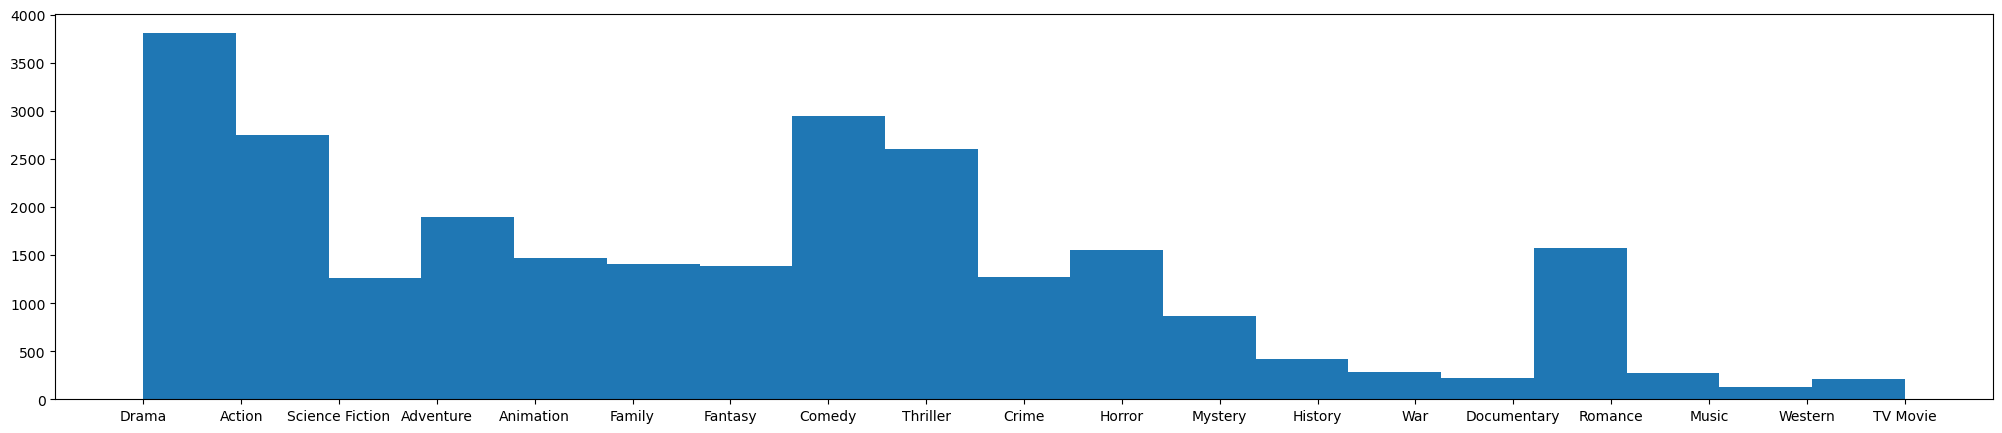

In [155]:
plt.figure(figsize=(25, 5))
plt.hist(genres, bins=len(set(genres)));

In [156]:
df.head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year,ratio_rev_budg
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,3.621556
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,5.036511
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,7.244590


In [157]:
df.orig_lang.value_counts()

orig_lang
 English                                7417
 Japanese                                714
 Spanish, Castilian                      397
 Korean                                  388
 French                                  285
 Chinese                                 153
 Cantonese                               145
 Italian                                 142
 German                                   93
 Russian                                  66
 Tagalog                                  43
 Portuguese                               35
 Thai                                     34
 Norwegian                                29
 Hindi                                    26
 Polish                                   26
 Danish                                   23
 Dutch, Flemish                           22
 Swedish                                  22
 Turkish                                  22
 Indonesian                               11
 Malayalam                                 7


In [158]:
df.country.value_counts()

country
AU    4885
US    2750
JP     538
KR     361
FR     222
GB     174
ES     153
HK     125
IT     123
MX     105
CN      93
DE      88
CA      67
RU      52
IN      43
PH      43
AR      41
BR      38
TH      30
DK      24
PL      22
TR      20
NO      16
NL      16
CO      14
TW      13
ID      12
IE      11
CL       9
SE       9
BE       7
PE       7
FI       6
GR       6
CH       5
SU       5
UA       4
SG       4
VN       3
HU       3
ZA       3
IR       2
PR       2
CZ       2
GT       2
IS       2
SK       2
UY       2
AT       2
MY       2
LV       1
KH       1
PT       1
XC       1
IL       1
MU       1
PY       1
DO       1
BO       1
BY       1
Name: count, dtype: int64

In [159]:
df.status.value_counts()

status
 Released           10131
 Post Production       31
 In Production         16
Name: count, dtype: int64

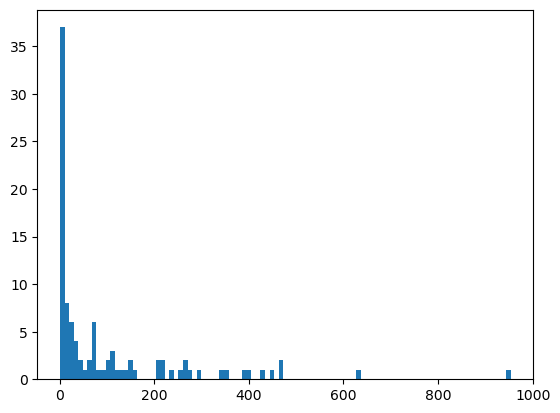

In [163]:
plt.hist(df.release_year.value_counts(), bins=df.release_year.nunique());

<Axes: ylabel='Frequency'>

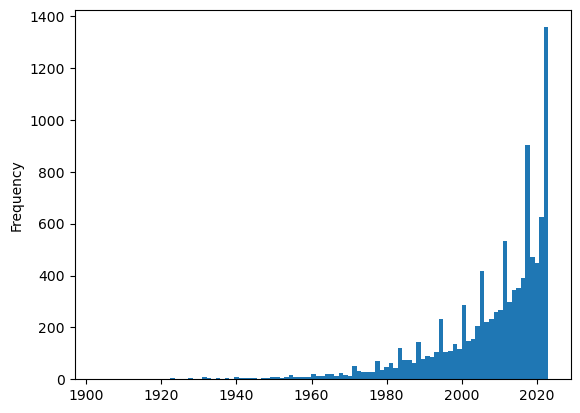

In [168]:
df.release_year.plot.hist(bins=df.release_year.nunique())

### 🔹 Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ مشابه با مثال بالا، تغییراتی روی ستون‌های دیتاست imdb_top_1000 اعمال کنید. 
</div>

## **🔶 Section 9: String Operations**

### 🔹 `pandas.Series.str.*`

In [7]:
pd.Series.str

pandas.core.strings.accessor.StringMethods

### 🔹 Sample Data

In [38]:
math = {'sara':88, 'sophia':98, 'john':75, 'ann':82}
calculus = {'sara':79, 'sophia':99, 'john':81, 'ann':87}
sport = {'sara':92, 'sophia':89, 'john':87, 'ann':98}
grade = {'sara':'fd', 'sophia':'sbfs', 'john':' bbsdfg ', 'ann':' bchfbbbdf  '}
df = pd.DataFrame({'math': math, 'calculus': calculus, 'sport': sport, 'grade':grade})
df

,math,calculus,sport,grade
sara,88,79,92,fd
sophia,98,99,89,sbfs
john,75,81,87,bbsdfg
ann,82,87,98,bchfbbbdf


### 🔹 `lower()` & `upper()`

In [13]:
df.grade.str.lower()
df.grade.str.upper()

sara               FD
sophia           SBFS
john          BBSDFG 
ann        BCHFBBBD  
Name: grade, dtype: object

In [14]:
df.grade.apply(str.upper)

sara               FD
sophia           SBFS
john          BBSDFG 
ann        BCHFBBBD  
Name: grade, dtype: object

### 🔹 `count()`

In [15]:
df.grade.str.count('b')

sara      0
sophia    1
john      2
ann       4
Name: grade, dtype: int64

### 🔹 `endswith()` & `startswith()`

In [26]:
df.grade.str.endswith(' ')

sara      False
sophia    False
john       True
ann        True
Name: grade, dtype: bool

In [27]:
df.grade.str.startswith('s')

sara      False
sophia     True
john      False
ann       False
Name: grade, dtype: bool

### 🔹 `find()` & `index()`

In [29]:
df.grade.str.find('b')

sara     -1
sophia    1
john      1
ann       1
Name: grade, dtype: int64

In [34]:
df.grade.str.index('b')

ValueError: substring not found

In [35]:
df.grade.str.index('f')

sara      0
sophia    2
john      5
ann       4
Name: grade, dtype: int64

In [39]:
df.grade.str.rindex('f')

sara      0
sophia    2
john      5
ann       9
Name: grade, dtype: int64

### 🔹 `split()` & `rsplit()`

In [40]:
df.grade.str.split('b')

sara                    [fd]
sophia               [s, fs]
john            [ , , sdfg ]
ann       [ , chf, , , df  ]
Name: grade, dtype: object

### 🔹 `strip()` & `rstrip()`

In [43]:
df.grade

sara                fd
sophia            sbfs
john           bbsdfg 
ann        bchfbbbdf  
Name: grade, dtype: object

In [41]:
df.grade.str.strip()

sara             fd
sophia         sbfs
john         bbsdfg
ann       bchfbbbdf
Name: grade, dtype: object

### 🔹 `replace()` & `partition()`

In [44]:
df.grade.str.replace('bbb', '***')

sara                fd
sophia            sbfs
john           bbsdfg 
ann        bchf***df  
Name: grade, dtype: object

In [47]:
df.grade.str.partition('b')

,0,1,2
sara,fd,,
sophia,s,b,fs
john,,b,bsdfg
ann,,b,chfbbbdf


### 🔹 isfunctions

`islower()` , `isupper()` , `isnumeric()` , `isalnum()` , `isdecimal()`
`isalpha()` , `isdigit()` , `isspace()` , `istitle()`

In [48]:
df.grade = df.grade.str.replace('bbb', '***')
df

,math,calculus,sport,grade
sara,88,79,92,fd
sophia,98,99,89,sbfs
john,75,81,87,bbsdfg
ann,82,87,98,bchf***df


In [49]:
df.grade.str.isnumeric()

sara      False
sophia    False
john      False
ann       False
Name: grade, dtype: bool

In [50]:
df.grade.str.isalnum()

sara       True
sophia     True
john      False
ann       False
Name: grade, dtype: bool

In [53]:
flags = df.grade.str.isalnum()
df.loc[~flags]

,math,calculus,sport,grade
john,75,81,87,bbsdfg
ann,82,87,98,bchf***df


## **✍️ Example: Movies Dataset**

### 🔹 Dataset 1

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست ساختگی اعمال کنید. 
</div>

In [ ]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forrest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [ ]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
df.head()

### 🔹 Dataset 2

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست imdb_movies اعمال کنید. 
</div>

In [57]:
df = pd.read_csv('data/imdb_movies.csv')

# year 
df['release_year'] = df.date_x.apply(lambda x: int(x.split('/')[-1]))
del df['date_x']

# score
df['score'] = df['score'].apply(lambda x: x/10)

# genre
df.genre = df.genre.apply(lambda x: x.split(',\xa0') if type(x) == str else [])

# crew
df.crew = df.crew.apply(lambda x: x.split(', ') if type(x) == str else [])

df.head()

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,7.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","[Óscar Barberán, Thut (voice), Ana Esther Albo...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,6.1,[Action],Good-hearted teenager William always lived in ...,"[Skeet Ulrich, Roy Cameron, Anne Heche, Dr Qui...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


In [59]:
df.orig_lang = df.orig_lang.str.split(', ')
df.head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,[ English],75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,[ English],460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,[ English],100000000.0,7.244590e+08,AU,2023


### 🔹 Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ مشابه با مثال بالا، تغییراتی روی ستون‌های دیتاست imdb_top_1000 اعمال کنید. 
</div>

## **🔶 Section 10: Comparison & Logical Operations**

In [86]:
math = {'sara':88, 'sophia':98, 'john':75, 'ann':82}
calculus = {'sara':79, 'sophia':99, 'john':81, 'ann':87}
sport = {'sara':92, 'sophia':89, 'john':87, 'ann':98}
grade = {'sara':'fd', 'sophia':'sbfs', 'john':' bbsdfg ', 'ann':' bchfbbbdf  '}
df = pd.DataFrame({'math': math, 'calculus': calculus, 'sport': sport, 'grade':grade})
df

,math,calculus,sport,grade
sara,88,79,92,fd
sophia,98,99,89,sbfs
john,75,81,87,bbsdfg
ann,82,87,98,bchfbbbdf


### 🔹 Comparison operators

<table style="margin-left: 0; font-size: 16px; font-family: Consolas, monospace; border-collapse: collapse; border: 1px solid gray;">
  <tr>
    <th style="border: 1px solid gray; text-align: center;">Operation</th>
    <th style="border: 1px solid gray;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">==</td>
    <td style="border: 1px solid gray;">Equal to</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">!=</td>
    <td style="border: 1px solid gray;">Not equal to</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">&lt;</td>
    <td style="border: 1px solid gray;">Less than</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">&gt;</td>
    <td style="border: 1px solid gray;">Greater than</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">&lt;=</td>
    <td style="border: 1px solid gray;">Less than or equal to</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">&gt;=</td>
    <td style="border: 1px solid gray;">Greater than or equal to</td>
  </tr>
</table>


In [89]:
flags = df == 98
df[flags]

,math,calculus,sport,grade
sara,NaN,NaN,NaN,NaN
sophia,98.0,NaN,NaN,NaN
john,NaN,NaN,NaN,NaN
ann,NaN,NaN,98.0,NaN


In [91]:
df[df.math >= 80]

,math,calculus,sport,grade
sara,88,79,92,fd
sophia,98,99,89,sbfs
ann,82,87,98,bchfbbbdf


In [94]:
df[df.grade.str.count('b') > 2]

,math,calculus,sport,grade
ann,82,87,98,bchfbbbdf


In [99]:
df.grade == 'fd'

sara       True
sophia    False
john      False
ann       False
Name: grade, dtype: bool

### 🔹 Logical operators

<table style="margin-left: 0; font-size: 16px; font-family: Consolas, monospace; border-collapse: collapse; border: 1px solid gray;">
  <tr>
    <th style="border: 1px solid gray; text-align: center;">Operation</th>
    <th style="border: 1px solid gray;">Description</th>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">&</td>
    <td style="border: 1px solid gray;">Element-wise AND</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">|</td>
    <td style="border: 1px solid gray;">Element-wise OR</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">^</td>
    <td style="border: 1px solid gray;">Element-wise XOR</td>
  </tr>
  <tr>
    <td style="border: 1px solid gray; text-align: center;">~</td>
    <td style="border: 1px solid gray;">Element-wise NOT</td>
  </tr>
</table>


In [102]:
flags = df.math >= 80
df[~flags]

,math,calculus,sport,grade
john,75,81,87,bbsdfg


In [106]:
flags = (df.math >= 90) & (df.calculus >= 90)
df[~flags]

,math,calculus,sport,grade
sara,88,79,92,fd
john,75,81,87,bbsdfg
ann,82,87,98,bchfbbbdf


In [108]:
flags = (df.math >= 85) | (df.calculus >= 85)
df[flags]

,math,calculus,sport,grade
sara,88,79,92,fd
sophia,98,99,89,sbfs
ann,82,87,98,bchfbbbdf


## **✍️ Example: Movies Dataset**

### 🔹 Dataset 1

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست ساختگی اعمال کنید. 
</div>

In [ ]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forrest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [ ]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
df.head()

### 🔹 Dataset 2

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست imdb_movies اعمال کنید. 
</div>

In [43]:
df = pd.read_csv('data/imdb_movies.csv')

# year 
df['release_year'] = df.date_x.apply(lambda x: int(x.split('/')[-1]))
del df['date_x']

# score
df['score'] = df['score'].apply(lambda x: x/10)

# genre
df.genre = df.genre.apply(lambda x: x.split(',\xa0') if type(x) == str else [])

# crew
df.crew = df.crew.apply(lambda x: x.split(', ') if type(x) == str else [])

# orig_lang
df.orig_lang = df.orig_lang.str.split(', ')

# status
df.status = df.status.str.strip()

df.head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,[ English],75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,[ English],460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,[ English],100000000.0,7.244590e+08,AU,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    فیلم‌های با امتیاز بالاتر از 9.5 را پیدا کنید. 
</div>

In [27]:
df[df.score >= 9.5]

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
277,Orgasm Lecture 2,10.0,[Drama],"Yuner, Liu Ren, and Zhou Xian are college girl...","[Min Do-yoon, , Park Soo-bin-III, , Hong Sae-h...",오르가즘 특강 2,Released,[ Korean],201000000.0,1.569324e+09,KR,2020
443,El asistente,10.0,[Comedy],We don't have an overview translated in Englis...,"[Rodrigo Noya, Miguel, Luis Cao, Jimmy, Floren...",El asistente,Released,"[ Spanish, Castilian]",201000000.0,1.569324e+09,AR,2023
934,Female Boss Hooker,10.0,"[Drama, Romance]",Ji-cheol is a job seeker who only plays and ea...,"[Ye Seul, , Lee Sul-ah-I, , Min Do-yoon, , Jo ...",여사장 후리꾼,Released,[ Korean],201000000.0,1.569324e+09,KR,2020
1776,Porno document: Toruko tokkyû bin,10.0,[],Pinku from 1982.,"[Jun Miho, , Rumi Kagawa, , Miyuki Oka, , Kayo...",ポルノドキュメント トルコ特急便,Released,[ Japanese],201000000.0,1.569324e+09,JP,1982
4887,Pretty Young Sister 4,10.0,"[Drama, Romance]",Jeong-woo who is tired of instant food and liv...,"[Ha Yeon, , Shin Yeon-ho, , Kang Seo, , Yoon D...",예쁜 여동생 4,Released,[ Korean],201000000.0,1.569324e+09,KR,2021
5404,The Chosen: Season 3 - Episodes 1 & 2,10.0,"[Drama, History]",After Jesus completes a sermon that turns the ...,"[Jonathan Roumie, Jesus, Noah James, Andrew, P...",The Chosen: Season 3 - Episodes 1 & 2,Released,[ English],201000000.0,1.569324e+09,US,2022
5683,Rathinirvedam,9.5,[],The story takes place in a small village surro...,"[Jayabharathi, Rathi, Krishnachandran, Pappu, ...",Rathinirvedam,Released,[ Malayalam],227800000.0,1.916347e+09,IN,1978
6433,"Furin, hentai, monmon chômon",10.0,[Drama],"Minoru is dead. However, he was conscious for ...","[Tomoka Takase, Maya Iizuka, Riona Suzushiro, ...",不倫、変態、悶々弔問,Released,[ Japanese],201000000.0,1.569324e+09,JP,2019
7815,Rebound,9.8,[Drama],Joong-Ang High School was once renowned for it...,"[Ahn Jae-hong, Kang Yang-hyun, Lee Sin-young, ...",리바운드,Released,[ Korean],45000000.0,1.749201e+07,KR,2023
8232,Housekeeper,10.0,[Romance],"Min-woo, the consulate general of the overseas...","[Ahn So-hee, , Min Do-yoon, , Kang Min-woo, , ...",예쁜식모,Released,[ Korean],201000000.0,1.569324e+09,KR,2020


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    فیلم‌های در وضعیت Post Production را پیدا کنید. 
</div>

In [46]:
df.status.value_counts()
df[df.status == 'Post Production']

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
117,Fast X,0.0,"[Action, Crime, Thriller]",Over many missions and against impossible odds...,"[Vin Diesel, Dominic Toretto, Michelle Rodrigu...",Fast X,Post Production,[ English],340000000.0,0.0,US,2023
216,The Little Mermaid,0.0,"[Adventure, Family, Fantasy, Romance]","The youngest of King Triton’s daughters, and t...","[Halle Bailey, Ariel, Jonah Hauer-King, Prince...",The Little Mermaid,Post Production,[ English],205000000.0,178359863.0,US,2023
229,Transformers: Rise of the Beasts,0.0,"[Action, Adventure, Science Fiction]",A ‘90s globetrotting adventure that introduces...,"[Anthony Ramos, Noah, Dominique Fishback, Elen...",Transformers: Rise of the Beasts,Post Production,[ English],200000000.0,1240261.6,US,2023
231,Spider-Man: Across the Spider-Verse,0.0,"[Animation, Action, Adventure, Science Fiction]","After reuniting with Gwen Stacy, Miles Morales...","[Shameik Moore, Miles Morales / Spider-Man (vo...",Spider-Man: Across the Spider-Verse,Post Production,[ English],264940000.0,175269998.8,US,2023
373,Barbie,0.0,[Comedy],To live in Barbie Land is to be a perfect bein...,"[Margot Robbie, Barbie, Ryan Gosling, Ken, Ame...",Barbie,Post Production,[ English],175000000.0,178359863.0,US,2023
414,Guardians of the Galaxy Volume 3,0.0,"[Science Fiction, Adventure, Comedy]","Peter Quill, still reeling from the loss of Ga...","[Chris Pratt, Peter Quill / Star-Lord, Zoe Sal...",Guardians of the Galaxy Volume 3,Post Production,[ English],250000000.0,1240261.6,AU,2023
567,Extraction 2,0.0,"[Action, Thriller]",After barely surviving his grievous wounds fro...,"[Chris Hemsworth, Tyler Rake, Rudhraksh Jaiswa...",Extraction 2,Post Production,[ English],226000000.0,175269998.8,US,2023
796,The Flash,0.0,"[Science Fiction, Action, Adventure]",The Flash travels through time to prevent the ...,"[Ezra Miller, Barry Allen / The Flash, Sasha C...",The Flash,Post Production,[ English],200000000.0,1240261.6,US,2023
843,Knights of the Zodiac,0.0,"[Fantasy, Action, Adventure]","When a headstrong street orphan, Seiya, in sea...","[Mackenyu, Seiya, Famke Janssen, Guraad, Madis...",Knights of the Zodiac,Post Production,[ English],264940000.0,175269998.8,JP,2023
1035,Ladybug & Cat Noir: The Movie,0.0,"[Animation, Fantasy, Action]",A pair of Parisian high schoolers protect thei...,"[Anouck Hautbois, Marinette Dupain-Cheng / Lad...","Miraculous, le film",Post Production,[ French],86000000.0,1240261.6,FR,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    از بین فیلم‌های 2022 به بعد، فیلم‌های با امتیاز بالاتر از 9 را پیدا کنید. 
</div>

In [53]:
df[(df.release_year >= 2022) & (df.score >= 9.)]

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
443,El asistente,10.0,[Comedy],We don't have an overview translated in Englis...,"[Rodrigo Noya, Miguel, Luis Cao, Jimmy, Floren...",El asistente,Released,"[ Spanish, Castilian]",201000000.0,1.569324e+09,AR,2023
1317,"La Usurpadora, the Musical",9.0,"[Music, Comedy, Drama]","Two identical twin sisters, separated at birth...","[Isabella Castillo, Valeria / Victoria, Alan E...","La Usurpadora, El Musical",Released,"[ Spanish, Castilian]",254000000.0,1.656280e+09,MX,2023
2156,BTS: Permission to Dance on Stage - LA,9.2,"[Music, Documentary]","Purple colors the city of Los Angeles, as BTS ...","[Kim Nam-joon, Self, Kim Seok-jin, Self, Min Y...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,[ Korean],215600000.0,1.748017e+09,KR,2022
4483,Louis Tomlinson: All of Those Voices,9.1,"[Documentary, Music]",Ditching the typical glossy sheen of celebrity...,"[Louis Tomlinson, Self, Oliver Wright, Louis’ ...",Louis Tomlinson: All of Those Voices,Released,[ English],178800000.0,2.081794e+09,GB,2023
5404,The Chosen: Season 3 - Episodes 1 & 2,10.0,"[Drama, History]",After Jesus completes a sermon that turns the ...,"[Jonathan Roumie, Jesus, Noah James, Andrew, P...",The Chosen: Season 3 - Episodes 1 & 2,Released,[ English],201000000.0,1.569324e+09,US,2022
7815,Rebound,9.8,[Drama],Joong-Ang High School was once renowned for it...,"[Ahn Jae-hong, Kang Yang-hyun, Lee Sin-young, ...",리바운드,Released,[ Korean],45000000.0,1.749201e+07,KR,2023
9582,Charlton Heston: Radical to Right Wing,9.0,"[Documentary, TV Movie]",A look at the life and work of the iconic US a...,"[Maud Guillaumin, Self - Narrator (voice), Jon...",Charlton Heston : la démesure d'un géant,Released,[ French],264000000.0,1.263824e+09,FR,2023
10046,Simulant,10.0,"[Science Fiction, Thriller]",Faye attempts to replace her newly deceased hu...,"[Robbie Amell, Evan, Jordana Brewster, Faye, S...",Hello Stranger,Released,[ English],201000000.0,1.569324e+09,US,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    بهترین فیلم‌های درام سه سال اخیر را پیدا کنید. 
</div>

In [78]:
df_3y = df[df.release_year > 2020]
df_3y = df_3y[df_3y.genre.apply(lambda x: 'Drama' in x)]
df_3y.sort_values(by='score', ascending=False, inplace=True)
df_3y.head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
4887,Pretty Young Sister 4,10.0,"[Drama, Romance]",Jeong-woo who is tired of instant food and liv...,"[Ha Yeon, , Shin Yeon-ho, , Kang Seo, , Yoon D...",예쁜 여동생 4,Released,[ Korean],201000000.0,1.569324e+09,KR,2021
5404,The Chosen: Season 3 - Episodes 1 & 2,10.0,"[Drama, History]",After Jesus completes a sermon that turns the ...,"[Jonathan Roumie, Jesus, Noah James, Andrew, P...",The Chosen: Season 3 - Episodes 1 & 2,Released,[ English],201000000.0,1.569324e+09,US,2022
7815,Rebound,9.8,[Drama],Joong-Ang High School was once renowned for it...,"[Ahn Jae-hong, Kang Yang-hyun, Lee Sin-young, ...",리바운드,Released,[ Korean],45000000.0,1.749201e+07,KR,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    بهترین انیمیشن‌های ده سال اخیر را لیست کنید. 
</div>

In [93]:
df2 = df[df.release_year > 2013]
df2 = df2[df2.genre.apply(lambda x: 'Animation' in x)]
df2.sort_values(by='score', ascending=False, inplace=True)
df2.head(5)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
1500,THE FIRST SLAM DUNK,8.6,"[Animation, Comedy, Drama]",Hanamichi Sakuragi is a delinquent with a long...,"[Shugo Nakamura, Ryota Miyagi (voice), Jun Kas...",THE FIRST SLAM DUNK,Released,[ Japanese],9237023.8,8.000475e+07,JP,2022
340,Teasing Master Takagi-san: The Movie,8.6,"[Animation, Comedy, Romance]",Takagi and Nishikata are in their final year o...,"[Yuki Kaji, Nishikata (voice), Rie Takahashi, ...",劇場版 からかい上手の高木さん,Released,[ Japanese],189000000.0,1.168750e+09,JP,2022
405,Your Name.,8.5,"[Romance, Animation, Drama]",High schoolers Mitsuha and Taki are complete s...,"[Ryunosuke Kamiki, Taki Tachibana (voice), Mon...",君の名は。,Released,[ Japanese],2937023.8,3.579861e+08,AU,2016
4855,Primal: Tales of Savagery,8.5,"[Action, Adventure, Animation, Drama]",Genndy Tartakovsky's Primal: Tales of Savagery...,"[Bryan Andrews, , Darrick Bachman, , Jon Olson, ]",Primal: Tales of Savagery,Released,[ English],160600000.0,8.822699e+08,US,2019
3793,"The Boy, the Mole, the Fox and the Horse",8.5,"[Animation, Family, Adventure, Fantasy]","The unlikely friendship of a boy, a mole, a fo...","[Jude Coward Nicoll, The Boy (voice), Tom Holl...","The Boy, the Mole, the Fox and the Horse",Released,[ English],149000000.0,9.544348e+08,GB,2022


### 🔹 Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ مشابه با مثال بالا، تغییراتی روی ستون‌های دیتاست imdb_top_1000 اعمال کنید. 
</div>

## **🔶 Section 11: Plotting**

### 🔹 Pandas + Matplotlib

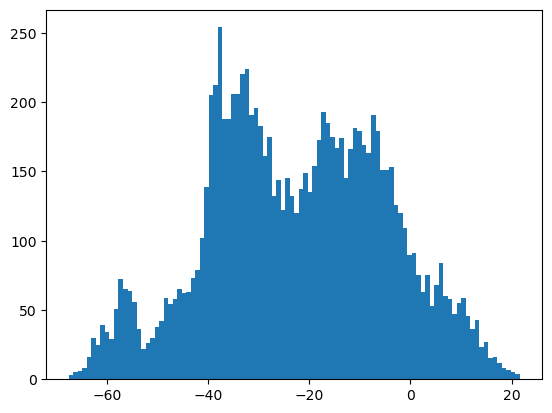

In [153]:
s = pd.Series(np.random.randn(10000).cumsum())
# plt.plot(s);
plt.hist(s, bins=100);

### 🔹 `*.plot.*`

In [154]:
pd.Series.plot.

pandas.plotting._core.PlotAccessor

In [155]:
pd.DataFrame.plot.

pandas.plotting._core.PlotAccessor

#### - `pandas.Series.plot()`

In [ ]:
pd.Series.plot(kind='line')
pd.Series.plot.line()

pd.Series.plot(kind='hist')
pd.Series.plot.hist()

<Axes: >

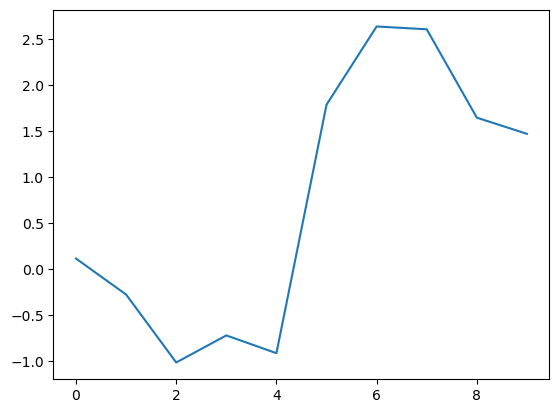

In [158]:
s = pd.Series(np.random.randn(10).cumsum())
# s.plot();
s.plot.line()

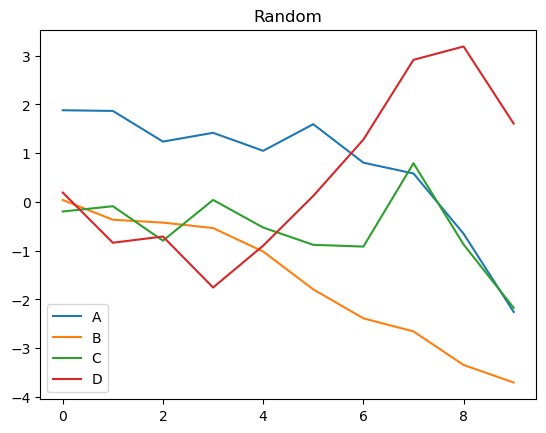

In [165]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=["A", "B", "C", "D"])
df.plot(title='Random');

In [160]:
df

,A,B,C,D
0,-0.145259,-1.253587,0.031985,0.639824
1,1.248008,-0.275492,0.833158,-0.298681
2,3.410950,0.676567,-1.332530,-1.458995
3,3.013159,2.203432,-1.662240,-1.745908
4,4.800809,2.625282,0.038842,-0.182123
5,5.566505,3.294564,0.598895,0.974408
6,6.608665,3.030006,2.363598,1.395920
7,8.372525,2.449684,5.674600,2.802031
8,6.904194,2.820229,5.093282,2.262149
9,7.114740,1.779915,5.572031,3.565853


In [161]:
pd.Series.plot??

Init signature: pd.Series.plot(data) -> 'None'
Source:        
class PlotAccessor(PandasObject):
    """
    Make plots of Series or DataFrame.

    Uses the backend specified by the
    option ``plotting.backend``. By default, matplotlib is used.

    Parameters
    ----------
    data : Series or DataFrame
        The object for which the method is called.
    x : label or position, default None
        Only used if data is a DataFrame.
    y : label, position or list of label, positions, default None
        Allows plotting of one column versus another. Only used if data is a
        DataFrame.
    kind : str
        The kind of plot to produce:

        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        - 'scatter' : scatter pl

#### - `pandas.Series.plot.line()`

<Axes: >

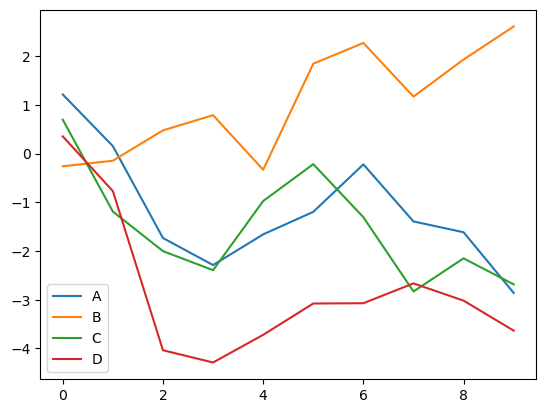

In [166]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=["A", "B", "C", "D"])
df.plot.line();

#### - `pandas.Series.plot.scatter()`

<Axes: xlabel='length', ylabel='width'>

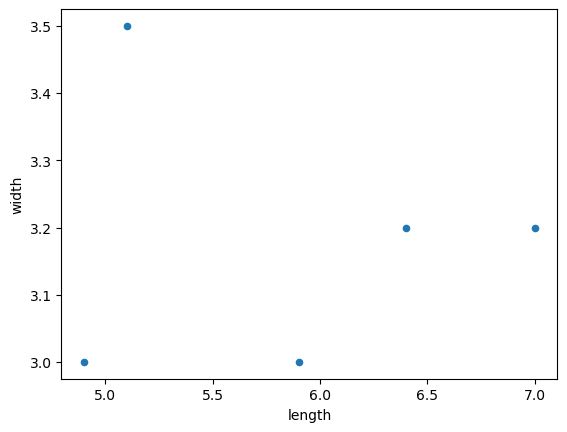

In [168]:
df = pd.DataFrame(
    [[5.1, 3.5, 0], 
     [4.9, 3.0, 0], 
     [7.0, 3.2, 1], 
     [6.4, 3.2, 1], 
     [5.9, 3.0, 2]],
    columns=['length', 'width', 'species'])

df.plot.scatter(x='length', y='width')

#### - `pandas.Series.plot.bar()`

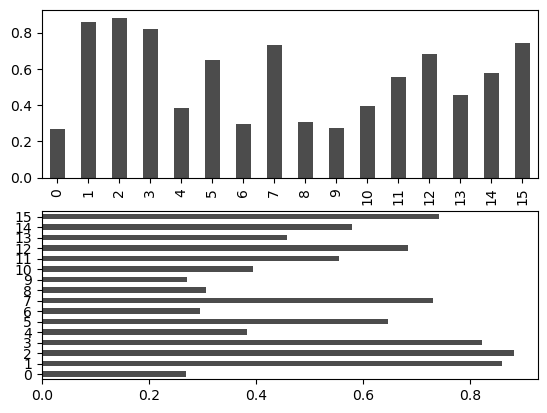

In [177]:
fig, axes = plt.subplots(2, 1)

df = pd.Series(np.random.rand(16))

df.plot.bar(ax=axes[0], color="black", alpha=0.7)
df.plot.barh(ax=axes[1], color="black", alpha=0.7);

<Axes: >

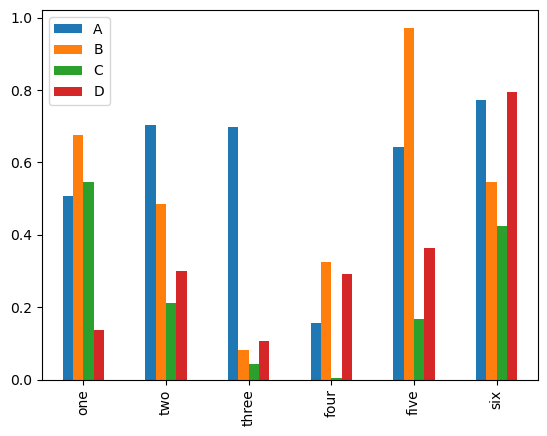

In [179]:
df = pd.DataFrame(
    np.random.rand(6, 4),
    index=["one", "two", "three", "four", "five", "six"],
    columns=pd.Index(["A", "B", "C", "D"])
)

df.plot.bar()

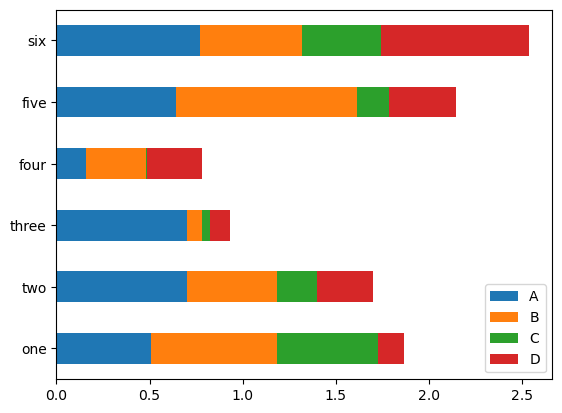

In [183]:
df.plot.barh(stacked=True);

#### - `pandas.Series.plot.hist()`

<Axes: ylabel='Frequency'>

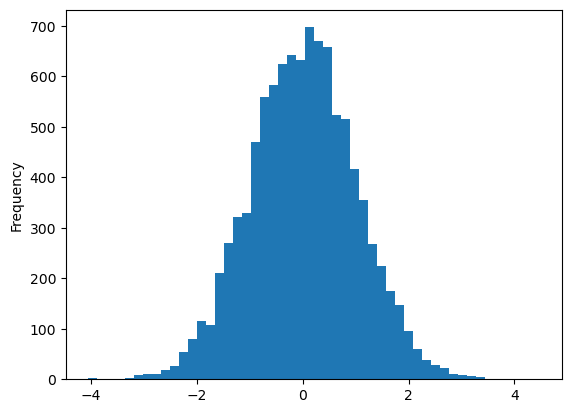

In [184]:
s = pd.Series(np.random.randn(10000))

s.plot.hist(bins=50)

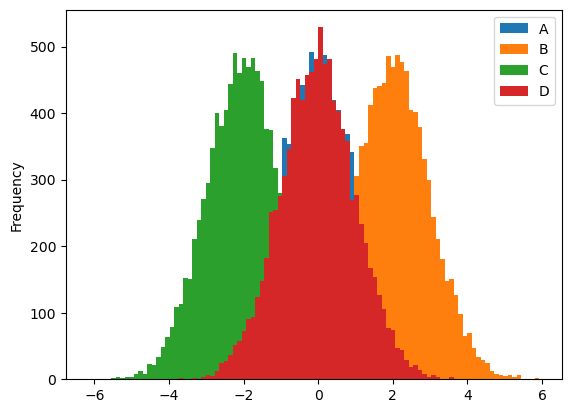

In [185]:
df = pd.DataFrame(
    np.random.randn(10000, 4),
    columns=pd.Index(["A", "B", "C", "D"])
)
df.B = df.B + 2
df.C = df.C - 2

df.plot.hist(bins=100);

#### - `pandas.Series.plot.box()`

<Axes: >

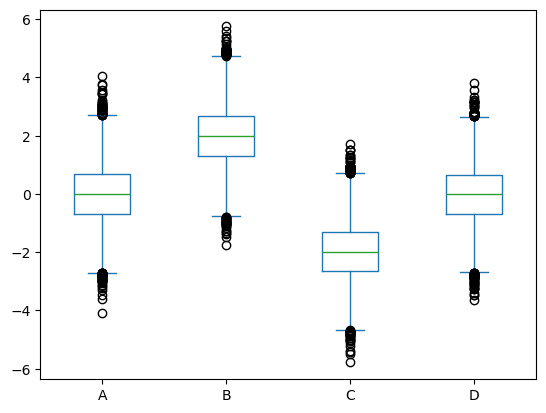

In [186]:
df = pd.DataFrame(
    np.random.randn(10000, 4),
    columns=pd.Index(["A", "B", "C", "D"])
)
df.B = df.B + 2
df.C = df.C - 2

df.plot.box()

#### - `pandas.Series.plot.pie()`

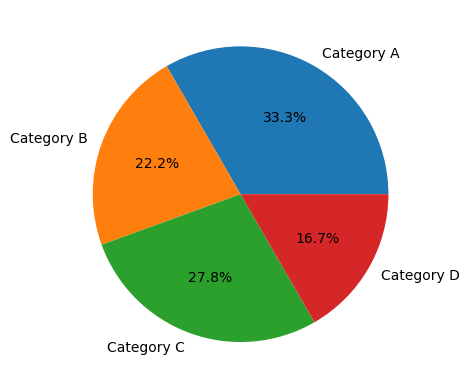

In [189]:
s = pd.Series([30, 20, 25, 15], index=['Category A', 'Category B', 'Category C', 'Category D'])

# s.plot.pie();
s.plot.pie(autopct='%1.1f%%');

#### - `pandas.Series.plot.kde()`

ModuleNotFoundError: No module named 'scipy'

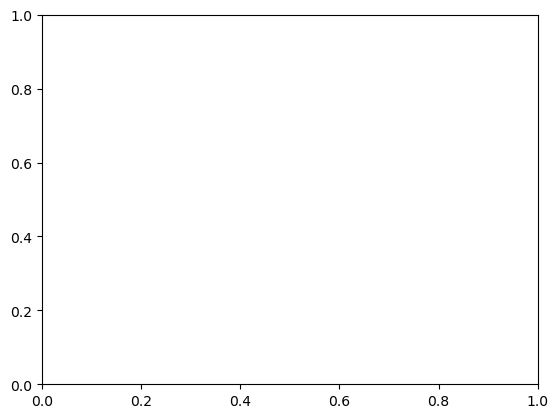

In [190]:
df = pd.DataFrame(
    np.random.randn(10000, 4),
    columns=pd.Index(["A", "B", "C", "D"])
)
df.B = df.B + 2
df.C = df.C - 2

df.plot.kde()
df.plot.density()

## **✍️ Example: Movies Dataset**

### 🔹 Dataset 1

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست ساختگی اعمال کنید. 
</div>

In [ ]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forrest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [ ]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
df.head()

### 🔹 Dataset 2

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست imdb_movies اعمال کنید. 
</div>

In [26]:
df = pd.read_csv('data/imdb_movies.csv')

# year 
df['release_year'] = df.date_x.apply(lambda x: int(x.split('/')[-1]))
del df['date_x']

# score
df['score'] = df['score'].apply(lambda x: x/10)

# genre
df.genre = df.genre.apply(lambda x: x.split(',\xa0') if type(x) == str else [])

# crew
df.crew = df.crew.apply(lambda x: x.split(', ') if type(x) == str else [])

# orig_lang
df.orig_lang = df.orig_lang.str.split(', ')

# status
df.status = df.status.str.strip()

df.head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,[ English],75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,[ English],460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,[ English],100000000.0,7.244590e+08,AU,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    توزیع نمرات فیلم‌ها به چه صورت هست؟ 
</div>

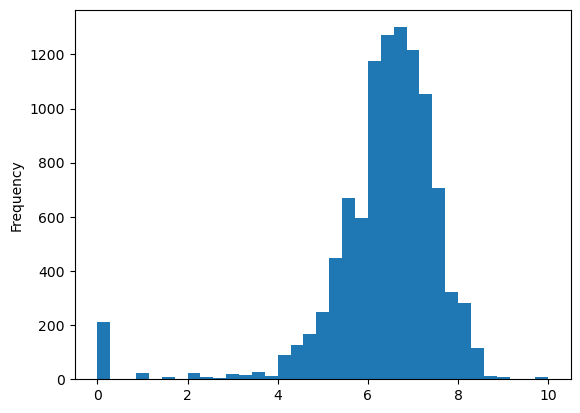

In [30]:
df.score.plot.hist(bins=35);

In [51]:
year_2013 = df[df.release_year == 2013]
year_2023 = df[df.release_year == 2023]
year_2013.shape[0], year_2023.shape[0]

(298, 403)

<Axes: ylabel='Frequency'>

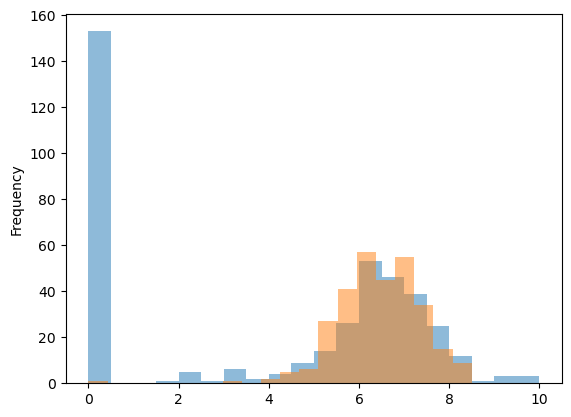

In [52]:
year_2023.score.plot(kind='hist', bins=20, alpha=0.5)
year_2013.score.plot(kind='hist', bins=20, alpha=0.5)

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    توزیع بودجه فیلم‌ها به چه صورت هست؟ 
</div>

<Axes: ylabel='Frequency'>

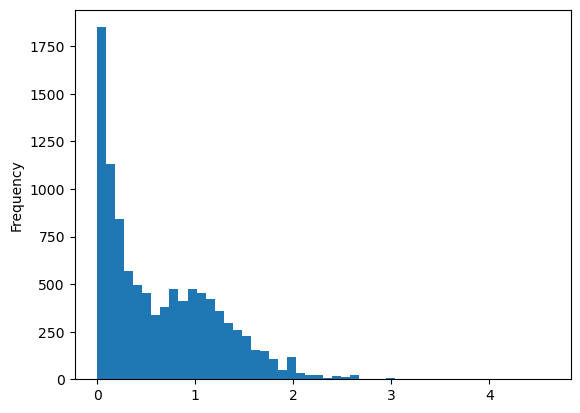

In [53]:
budget = df.budget_x / 1e8
budget.plot.hist(bins=50)

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    توزیع درآمد فیلم‌ها را نشان دهید. 
</div>

<Axes: ylabel='Frequency'>

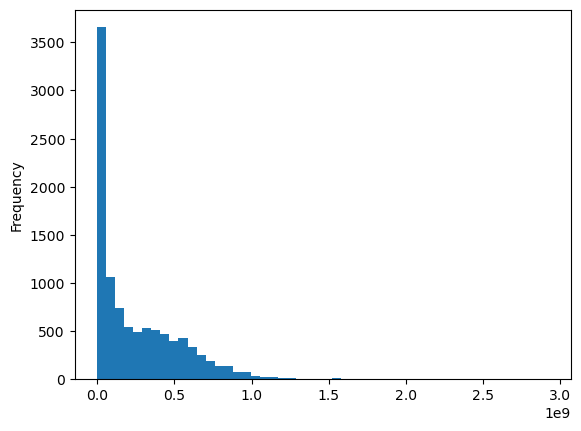

In [54]:
df.revenue.plot.hist(bins=50)

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    نمودار جعبه‌ای/هیستوگرام امتیاز ژانرهای درام و انیمیشن را مقایسه کنید.
</div>

In [55]:
drama = df[df.genre.apply(lambda x: 'Drama' in x)]
animation = df[df.genre.apply(lambda x: 'Animation' in x)]
drama.shape[0], animation.shape[0]

(3812, 1468)

<Axes: ylabel='Frequency'>

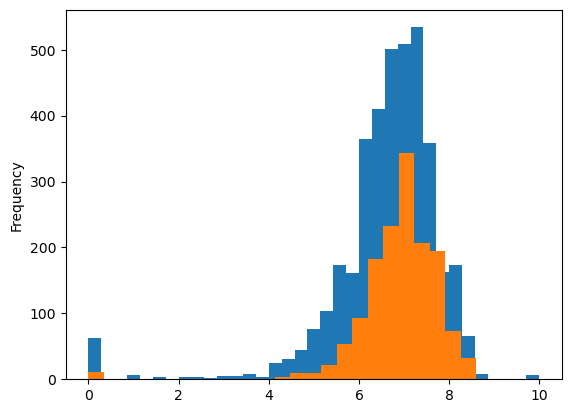

In [60]:
drama.score.plot(kind='hist', bins=35)
animation.score.plot(kind='hist', bins=25)

<Axes: >

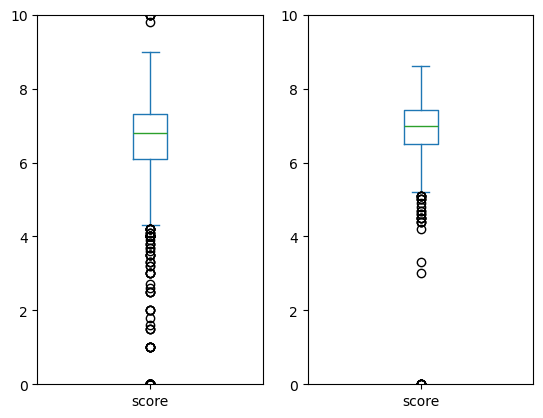

In [68]:
fig, axes = plt.subplots(1, 2)
drama.score.plot(kind='box', ax=axes[0], ylim=[0, 10])
animation.score.plot(kind='box', ax=axes[1], ylim=[0, 10])

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    فیلم‌های کره‌ای و ژاپنی را باهم مقایسه کنید. 
</div>

### 🔹 Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ مشابه با مثال بالا، تغییراتی روی ستون‌های دیتاست imdb_top_1000 اعمال کنید. 
</div>

## **🔶 Section 12: Data Cleaning**

### 🔹 Handling missing values

#### - What is nan?

In [78]:
arr1 = np.array([1, np.nan, 7.2, 6])
arr2 = np.array([3, 2.2, 2, 9])
arr1 + arr2

array([ 4. ,  nan,  9.2, 15. ])

#### - Detect nan values in Data Frames

##### `.isna()` & `.isnull()` 

In [79]:
arr = np.array([[7, 3, np.nan], [8, 6, 8], [np.nan, 1, 3], [7, 2, 5]])
df = pd.DataFrame(arr, columns=['c1', 'c2', 'c3'], index=['r1', 'r2', 'r3', 'r4'])
df

,c1,c2,c3
r1,7.0,3.0,NaN
r2,8.0,6.0,8.0
r3,NaN,1.0,3.0
r4,7.0,2.0,5.0


In [80]:
df.isnull()

,c1,c2,c3
r1,False,False,True
r2,False,False,False
r3,True,False,False
r4,False,False,False


In [81]:
df.isna()

,c1,c2,c3
r1,False,False,True
r2,False,False,False
r3,True,False,False
r4,False,False,False


In [86]:
df.isna().sum()

c1    1
c2    0
c3    1
dtype: int64

In [94]:
df[~df.isna().any(axis=1)]

,c1,c2,c3
r2,8.0,6.0,8.0
r4,7.0,2.0,5.0


##### `.notnull()`

In [97]:
df[df.notnull().all(axis=1)]

,c1,c2,c3
r2,8.0,6.0,8.0
r4,7.0,2.0,5.0


#### - Deal with nan values

##### `.dropna()`

In [100]:
df.dropna(axis=0)

,c1,c2,c3
r2,8.0,6.0,8.0
r4,7.0,2.0,5.0


##### `.fillna()`

In [101]:
df.fillna(-1)

,c1,c2,c3
r1,7.0,3.0,-1.0
r2,8.0,6.0,8.0
r3,-1.0,1.0,3.0
r4,7.0,2.0,5.0


In [106]:
df.c1 = df.c1.fillna(df.c1.median())
df

,c1,c2,c3
r1,7.0,3.0,NaN
r2,8.0,6.0,8.0
r3,7.0,1.0,3.0
r4,7.0,2.0,5.0


### 🔹 Handling duplicates

#### - What is duplicate?

In [118]:
arr = np.array([[7, 1, 3], [8, 6, 8], [np.nan, 1, 3], [8, 6, 8]])
df = pd.DataFrame(arr, columns=['c1', 'c2', 'c3'], index=['r1', 'r2', 'r3', 'r4'])
df

,c1,c2,c3
r1,7.0,1.0,3.0
r2,8.0,6.0,8.0
r3,NaN,1.0,3.0
r4,8.0,6.0,8.0


#### - Finding duplicates?

In [119]:
df.duplicated()

r1    False
r2    False
r3    False
r4     True
dtype: bool

In [121]:
df[~df.duplicated()]

,c1,c2,c3
r1,7.0,1.0,3.0
r2,8.0,6.0,8.0
r3,NaN,1.0,3.0


In [126]:
df.duplicated(keep=False)
df[df.duplicated(keep=False)]

,c1,c2,c3
r2,8.0,6.0,8.0
r4,8.0,6.0,8.0


In [127]:
df.duplicated(subset=['c2', 'c3'])

r1    False
r2    False
r3     True
r4     True
dtype: bool

In [131]:
df.T.duplicated()

c1    False
c2    False
c3    False
dtype: bool

#### - Removing duplicates?

In [132]:
df.drop_duplicates()

,c1,c2,c3
r1,7.0,1.0,3.0
r2,8.0,6.0,8.0
r3,NaN,1.0,3.0


In [133]:
df.drop_duplicates(keep='last')

,c1,c2,c3
r1,7.0,1.0,3.0
r3,NaN,1.0,3.0
r4,8.0,6.0,8.0


In [135]:
df.drop_duplicates(subset=['c2', 'c3'])

,c1,c2,c3
r1,7.0,1.0,3.0
r2,8.0,6.0,8.0


## **✍️ Example: Movies Dataset**

### 🔹 Dataset 1

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست ساختگی اعمال کنید. 
</div>

In [ ]:
movie_names = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Schindler's List",
               "12 Angry Men", "The Lord of the Rings", "Forrest Gump", "Whiplash", "Inception", "Downton Abbey"]

sell_price = [15, 20, 18, 12, 25, 10, 22, 14, 16, 19, 12]

genre = ["Drama", "Crime", "Action, Thriller", "Crime", "Drama, History", "Drama", 
         "Fantasy, Adventure", "Drama", "Drama, Music", "Sci-Fi, Thriller", "Drama, History"]

imdb = [9.3, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.7]

director = ["Darabont", "Coppola", "Nolan", "Tarantino", "Spielberg", "Lumet",
            "Jackson", "Zemeckis", "Chazelle", "Nolan", "Engler"]

year = [1994, 1972, 2008, 1994, 1993, 1957, 2003, 1994, 2014, 2010, 2019]

In [ ]:
cols = {"Sell Price": sell_price, "Genre": genre, "IMDB Score": imdb, "Director": director, "Year": year}

df = pd.DataFrame(cols, index=movie_names)
df.head()

### 🔹 Dataset 2

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ تغییراتی روی ستون‌های دیتاست imdb_movies اعمال کنید. 
</div>

In [152]:
df = pd.read_csv('data/imdb_movies.csv')

# year 
df['release_year'] = df.date_x.apply(lambda x: int(x.split('/')[-1]))
del df['date_x']

# score
df['score'] = df['score'].apply(lambda x: x/10)

# genre
df.genre = df.genre.apply(lambda x: x.split(',\xa0') if type(x) == str else np.nan)

# crew
df.crew = df.crew.apply(lambda x: x.split(', ') if type(x) == str else np.nan)

# orig_lang
df.orig_lang = df.orig_lang.str.split(', ')

# status
df.status = df.status.str.strip()

df.head(3)

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,[ English],75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,[ English],460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,[ English],100000000.0,7.244590e+08,AU,2023


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    چک کنید که آیا در دیتاست NaN وجود دارد؟ کدام ویژگی‌های NaN دارند؟ 
</div>

In [153]:
df.isna().sum()

names            0
score            0
genre           85
overview         0
crew            56
orig_title       0
status           0
orig_lang        0
budget_x         0
revenue          0
country          0
release_year     0
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         10178 non-null  object 
 1   score         10178 non-null  float64
 2   genre         10093 non-null  object 
 3   overview      10178 non-null  object 
 4   crew          10122 non-null  object 
 5   orig_title    10178 non-null  object 
 6   status        10178 non-null  object 
 7   orig_lang     10178 non-null  object 
 8   budget_x      10178 non-null  float64
 9   revenue       10178 non-null  float64
 10  country       10178 non-null  object 
 11  release_year  10178 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 954.3+ KB


<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
     مجموعا چند سمپل در دیتاست وجود دارد؟
</div>

In [161]:
print(df.isna().sum()[['genre', 'crew']].sum())
df.isna().any(axis=1).sum()

141


126

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    همه نمونه‌های حاوی NaN را حذف کنید.
</div>

In [164]:
df.dropna()

,names,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year
0,Creed III,7.3,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","[Michael B. Jordan, Adonis Creed, Tessa Thomps...",Creed III,Released,[ English],75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,7.8,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"[Sam Worthington, Jake Sully, Zoe Saldaña, Ney...",Avatar: The Way of Water,Released,[ English],460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,7.6,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","[Chris Pratt, Mario (voice), Anya Taylor-Joy, ...",The Super Mario Bros. Movie,Released,[ English],100000000.0,7.244590e+08,AU,2023
3,Mummies,7.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","[Óscar Barberán, Thut (voice), Ana Esther Albo...",Momias,Released,"[ Spanish, Castilian]",12300000.0,3.420000e+07,AU,2023
4,Supercell,6.1,[Action],Good-hearted teenager William always lived in ...,"[Skeet Ulrich, Roy Cameron, Anne Heche, Dr Qui...",Supercell,Released,[ English],77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,7.3,[Drama],"In 1979 Santa Barbara, California, Dorothea Fi...","[Annette Bening, Dorothea Fields, Lucas Jade Z...",20th Century Women,Released,[ English],7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,5.4,[Action],When DEA agents are taken captive by a ruthles...,"[Chuck Norris, Col. Scott McCoy, Billy Drago, ...",Delta Force 2: The Colombian Connection,Released,[ English],9145817.8,6.698361e+06,US,1990
10175,The Russia House,6.1,"[Drama, Thriller, Romance]","Barley Scott Blair, a Lisbon-based editor of R...","[Sean Connery, Bartholomew 'Barley' Scott Blai...",The Russia House,Released,[ English],21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,5.5,"[Action, Adventure, Science Fiction, Thriller,...",Darkman and Durant return and they hate each o...,"[Larry Drake, Robert G. Durant, Arnold Vosloo,...",Darkman II: The Return of Durant,Released,[ English],116000000.0,4.756613e+08,US,1995


In [163]:
len(df) - len(df.dropna())

126

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    NaN-های یک فیچر را پر کنید. 
</div>

In [168]:
df.genre.fillna(value='Drama')

0                                          [Drama, Action]
1                     [Science Fiction, Adventure, Action]
2          [Animation, Adventure, Family, Fantasy, Comedy]
3          [Animation, Comedy, Family, Adventure, Fantasy]
4                                                 [Action]
                               ...                        
10173                                              [Drama]
10174                                             [Action]
10175                           [Drama, Thriller, Romance]
10176    [Action, Adventure, Science Fiction, Thriller,...
10177                         [Animation, Family, Fantasy]
Name: genre, Length: 10178, dtype: object

### 🔹 Exercise

<div dir="rtl" style="margin-right: 13%; font-size: 20px;">
    ⭕ مشابه با مثال بالا، تغییراتی روی ستون‌های دیتاست imdb_top_1000 اعمال کنید. 
</div>

## **🔶 Section 13: Add/Remove Rows/Columns**

In [179]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds, name='sara')
hoda = pd.Series([15, 20, 18, 18], index=inds, name='hoda')

df1 = pd.DataFrame([sara, hoda])
df1

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18


In [180]:
inds = ['math', 'sport', 'art', 'farsi']

parsa = pd.Series([20, 20, 15, 10], index=inds, name='parsa')
saman = pd.Series([13, 17, 20, 20], index=inds, name='saman')

df2 = pd.DataFrame([parsa, saman])
df2

,math,sport,art,farsi
parsa,20,20,15,10
saman,13,17,20,20


In [181]:
inds = ['physics', 'algebra']

sara = pd.Series([18, 16], index=inds, name='sara')
hoda = pd.Series([15, 19], index=inds, name='hoda')
parsa = pd.Series([12, 11], index=inds, name='parsa')
saman = pd.Series([10, 20], index=inds, name='saman')

df3 = pd.DataFrame([sara, hoda, parsa, saman])
df3

,physics,algebra
sara,18,16
hoda,15,19
parsa,12,11
saman,10,20


In [237]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds, name='sara')
hana = pd.Series([10, 17, 20, 11], index=inds, name='hana')

df4 = pd.DataFrame([sara, hana])
df4

,math,sport,art,farsi
sara,20,18,19,20
hana,10,17,20,11


### 🔹 Add a column

#### - Using indexing

In [184]:
df1['physics'] = [12, 13]
df1

,math,sport,art,farsi,physics
sara,20,18,19,20,12
hoda,15,20,18,18,13


#### - Supplementary

In [191]:
df1.loc[:, 'bio'] = [10, 10]
df1

,math,sport,art,farsi,physics,bio
sara,20,18,19,20,12,10
hoda,15,20,18,18,13,10


In [193]:
df1.iloc[:, 6] = [20, 20]
df1

IndexError: iloc cannot enlarge its target object

##### - `.assign()`

In [194]:
df1.assign(calculus=[14, 16])

,math,sport,art,farsi,physics,bio,calculus
sara,20,18,19,20,12,20,14
hoda,15,20,18,18,13,20,16


In [195]:
df1.assign(statistics=[10, 20], geography=[12, 15])

,math,sport,art,farsi,physics,bio,statistics,geography
sara,20,18,19,20,12,20,10,12
hoda,15,20,18,18,13,20,20,15


In [196]:
df1.assign(math=[20, 18])

,math,sport,art,farsi,physics,bio
sara,20,18,19,20,12,20
hoda,18,20,18,18,13,20


##### - `.insert()`

In [198]:
df1.insert(1, 'arabic', [10, 15])
df1

,math,arabic,sport,art,farsi,physics,bio
sara,20,10,18,19,20,12,20
hoda,15,15,20,18,18,13,20


In [200]:
df1.insert(3, 'arabic', [10, 15], allow_duplicates=True)
df1

,math,arabic,sport,arabic,art,farsi,physics,bio
sara,20,10,18,10,19,20,12,20
hoda,15,15,20,15,18,18,13,20


### 🔹 Add a row

#### - `loc`

In [210]:
df1.loc['sahar'] = pd.Series({'math': 6, 'sport': 2, 'art': 4, 'farsi': 1})
df1

,math,arabic,sport,arabic,art,farsi,physics,bio
sara,20.0,10.0,18.0,10.0,19.0,20.0,12.0,20.0
hoda,15.0,15.0,20.0,15.0,18.0,18.0,13.0,20.0
sahar,6.0,NaN,2.0,NaN,4.0,1.0,NaN,NaN


In [214]:
df1.loc[len(df1)] = pd.Series({'math': 6, 'sport': 2, 'art': 4, 'farsi': 1})
df1

,math,arabic,sport,arabic,art,farsi,physics,bio
sara,20.0,10.0,18.0,10.0,19.0,20.0,12.0,20.0
hoda,15.0,15.0,20.0,15.0,18.0,18.0,13.0,20.0
sahar,6.0,NaN,2.0,NaN,4.0,1.0,NaN,NaN
3,6.0,NaN,2.0,NaN,4.0,1.0,NaN,NaN


#### - `iloc` ❌

In [211]:
df1

,math,arabic,sport,arabic,art,farsi,physics,bio
sara,20.0,10.0,18.0,10.0,19.0,20.0,12.0,20.0
hoda,15.0,15.0,20.0,15.0,18.0,18.0,13.0,20.0
sahar,6.0,NaN,2.0,NaN,4.0,1.0,NaN,NaN


In [212]:
len(df1)

3

In [213]:
df1.iloc[len(df1)] = {'math': 10, 'sport': 20, 'art': 12, 'farsi': 18}
df1

IndexError: iloc cannot enlarge its target object

### 🔹 Remove a column or a row

#### - `.drop()`

In [215]:
df1.drop('physics', axis=1)

,math,arabic,sport,arabic,art,farsi,bio
sara,20.0,10.0,18.0,10.0,19.0,20.0,20.0
hoda,15.0,15.0,20.0,15.0,18.0,18.0,20.0
sahar,6.0,NaN,2.0,NaN,4.0,1.0,NaN
3,6.0,NaN,2.0,NaN,4.0,1.0,NaN


In [217]:
df1.drop(3, axis=0)

,math,arabic,sport,arabic,art,farsi,physics,bio
sara,20.0,10.0,18.0,10.0,19.0,20.0,12.0,20.0
hoda,15.0,15.0,20.0,15.0,18.0,18.0,13.0,20.0
sahar,6.0,NaN,2.0,NaN,4.0,1.0,NaN,NaN


In [218]:
df1.drop(index='sahar', columns='arabic')

,math,sport,art,farsi,physics,bio
sara,20.0,18.0,19.0,20.0,12.0,20.0
hoda,15.0,20.0,18.0,18.0,13.0,20.0
3,6.0,2.0,4.0,1.0,NaN,NaN


In [220]:
df1.drop(index='hello', errors='ignore')

,math,arabic,sport,arabic,art,farsi,physics,bio
sara,20.0,10.0,18.0,10.0,19.0,20.0,12.0,20.0
hoda,15.0,15.0,20.0,15.0,18.0,18.0,13.0,20.0
sahar,6.0,NaN,2.0,NaN,4.0,1.0,NaN,NaN
3,6.0,NaN,2.0,NaN,4.0,1.0,NaN,NaN


#### - `.pop()` (only works for columns)

In [222]:
df1.pop('arabic')
df1

KeyError: 'arabic'

### 🔹 `pd.concat()`

In [225]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds, name='sara')
hoda = pd.Series([15, 20, 18, 18], index=inds, name='hoda')

df1 = pd.DataFrame([sara, hoda])
df1

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18


In [224]:
df2

,math,sport,art,farsi
parsa,20,20,15,10
saman,13,17,20,20


In [227]:
df3

,physics,algebra
sara,18,16
hoda,15,19
parsa,12,11
saman,10,20


In [226]:
pd.concat([df1, df2])

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18
parsa,20,20,15,10
saman,13,17,20,20


In [228]:
pd.concat([df1, df3], axis=1)

,math,sport,art,farsi,physics,algebra
sara,20.0,18.0,19.0,20.0,18,16
hoda,15.0,20.0,18.0,18.0,15,19
parsa,NaN,NaN,NaN,NaN,12,11
saman,NaN,NaN,NaN,NaN,10,20


In [230]:
df5 = pd.concat([df1, df2])
pd.concat([df5, df3], axis=1)

,math,sport,art,farsi,physics,algebra
sara,20,18,19,20,18,16
hoda,15,20,18,18,15,19
parsa,20,20,15,10,12,11
saman,13,17,20,20,10,20


#### - `join`

In [233]:
pd.concat([df1, df3], axis=1, join='inner')

,math,sport,art,farsi,physics,algebra
sara,20,18,19,20,18,16
hoda,15,20,18,18,15,19


#### - `verify_integrity`

In [242]:
df1

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18


In [243]:
df4

,math,sport,art,farsi
sara,20,18,19,20
hana,10,17,20,11


In [245]:
pd.concat([df1, df4], verify_integrity=True)

ValueError: Indexes have overlapping values: Index(['sara'], dtype='object')

#### - `ignore_index`

In [247]:
pd.concat([df1, df2], axis=0, ignore_index=True)

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18
2,20,20,15,10
3,13,17,20,20


In [248]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds)
hoda = pd.Series([15, 20, 18, 18], index=inds)

df1 = pd.DataFrame([sara, hoda])
df1

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18


In [249]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds)
hana = pd.Series([10, 17, 20, 11], index=inds)

df4 = pd.DataFrame([sara, hana])
df4

,math,sport,art,farsi
0,20,18,19,20
1,10,17,20,11


In [252]:
pd.concat([df1, df4], axis=0, ignore_index=True)

,math,sport,art,farsi
0,20,18,19,20
1,15,20,18,18
2,20,18,19,20
3,10,17,20,11


#### - `keys`

In [255]:
inds = ['math', 'sport', 'art', 'farsi']

sara = pd.Series([20, 18, 19, 20], index=inds, name='sara')
hoda = pd.Series([15, 20, 18, 18], index=inds, name='hoda')

df1 = pd.DataFrame([sara, hoda])
df1

,math,sport,art,farsi
sara,20,18,19,20
hoda,15,20,18,18


In [257]:
df = pd.concat([df1, df2], keys=['girls', 'boys'])
df

math  sport  art  farsi
girls sara     20     18   19     20
      hoda     15     20   18     18
boys  parsa    20     20   15     10
      saman    13     17   20     20

In [262]:
df.loc['girls', 'sara']

math     20
sport    18
art      19
farsi    20
Name: (girls, sara), dtype: int64

### 🔹 `append` 🪦

## 🥳 <font color='#4CCD99'>**The End!**</font> 👑